# Step 1 - 6
### Here is a notebook for [the MedExtractionPipeline](./MedExtractionPipeline.ipynb)

# Step 7: Processing Context

The template of this notebook is largely based on the MultiSentenceDocuments.ipynb example notebook by pyContextNLP

In [1]:
import sys
sys.path.append('../') 
sys.path.append('../modules') # Append Map with modules to the source tree
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import EMR_functions as em
from datetime import datetime, date, timedelta
from acronyms import DMARD

import modules.pyConTextNLP2.pyConTextNLP.pyConText as pyConText

import modules.pyConTextNLP2 #import itemData
#from textblob import TextBlob
import modules.pyConTextNLP2.pyConTextNLP.display.html as html
from IPython.display import display, HTML

def read_csv(f_name):
    return pd.read_csv(f_name, sep="|")

## Open Dataset

In [2]:
df_explore = pd.read_csv(r'output_files/DF_explore.csv', index_col=0, sep="|", na_values=['NA'])
print(len(df_explore))

5992


In [94]:
#df_gewricht = pd.read_csv(r'featureExtraction/DF_gewrichtspop.csv', index_col=0, sep="|", na_values=['NA'])
print(len(df_gewricht['PATNR'].unique()))
print(len(df_gewricht[df_gewricht['STELLING']=='Datum eerste consult']['PATNR'].unique()))
print(len(df_gewricht[df_gewricht['STELLING']=='Afspraak vervolgconsult']['PATNR'].unique()))

2607
67
5


In [8]:
df_gewricht[['CATEGORIE', 'DATUM', 'TIJD', 'MUTDAT', 'MUTTIJD',
       'GEBRUIKER', 'DEFINITIEF', 'COMPLEET', 'OPSLAGID', 'BEANTWID',
       'PARENTSTATUS_D', 'PARENTSTATUS_S', 'GROEP', 'ANTWOORD', 'XANTWOORD',
       'XSCORE', 'XEXT_CODE', 'YANTWOORD', 'YSCORE', 'YEXT_CODE', 'REALVRID',
       'OBJALIAS', 'OBJID', 'STATUS', 'HIERARCHY', 'ITEMID', 'PARENTANTW',
       'CONTROLID', 'NAAM', 'TABEL', 'VELD', 'RETURN_FIELD', 'ANCESTANTW',
       'BEVAT_SIBL', 'DATUM_A', 'TIJD_A', 'OPSLAGID_B', 'COMMENTAAR',
       'KOPPELID', 'AUTEURCD', 'SUPDAT', 'SUPTIJD', 'SUPERVISOR',
       'VRLIJSTTYPEID', 'DOSSIERID', 'PARENTBEANTWID', 'REALSUBID',
       'EENHEIDCD', 'MODEL_ID', 'CONFIG', 'DATA', 'STELLING']].head(500).to_csv(r'DF_BLIND_gewrichtspop.csv', sep='|', index=True)

In [3]:
df_MV = pd.read_csv(r'output_files/DF_MV.csv', index_col=0, sep="|") 

G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,7,8,10,12,16,20,22,25,26,27,29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
df_MV[(df_MV['MedicatieGPKOmschrijving'].str.contains('adalimumab', case=False))==True]['SchemaStartDatumtijd'].min()


'2006-10-05 00:00:00'

In [4]:
df_BezDat0 = df_MV.groupby('patient_id')['SchemaStartDatumtijd'].min()
print(len(df_BezDat0))
print(len(df_MV['patient_id'].unique()))

3506
3507


In [ ]:
#df_gewricht = df_gewricht.replace('', np.nan, regex=True)
df_MV.columns.value_counts().plot(kind='bar', figsize=(12,12), title='Entries per Column')

In [ ]:

print(len(df_gewricht['PATNR'].unique()))
print(len(df_gewricht[(df_gewricht['STELLING']=='Pijnlijke gewrichten') | (df_gewricht['STELLING']=='Gezwollen gewrichten')| (df_gewricht['STELLING']=='DAS 44') | (df_gewricht['STELLING']=='DAS 28')]['PATNR'].unique()))

In [ ]:
print('Totaal aantal pat', len(df_explore['PATNR'].unique()))
print('Overlap met Pat uit Exploreset:', len(df_explore[df_explore['PATNR'].isin(df_demo['PATNR'].unique())]['PATNR'].unique()))

In [ ]:
df_corrected = pd.read_csv(r'output_files/DF_proc_annotated.csv', index_col=0, sep="|", na_values=['NA'])
df_corrected['XANTWOORD'] = df_corrected['XANTWOORD'].apply(lambda x: re.sub(r'\s\.',r'.',x))
pc_df = em.Processing(df_corrected)

pc_df.getDF().head(10)['XANTWOORD']

In [ ]:
df_corrected['XANTWOORD'].to_csv(r'output_files/DF_blinded_textdata.csv', sep='|', index=True)

### Initialize list of modifiers & targets

- Targets = other words for entities
- Modifiers = terms that influence the meaning of the sentence (like negation terms)

In [7]:
import sys
sys.path.append('../') 
sys.path.append('../modules') 

import modules.pyConTextNLP2.pyConTextNLP.pyConText as pyConText
import modules.pyConTextNLP2.pyConTextNLP.itemData as itemData
from IPython.display import display, HTML
import EMR_functions as em


cp = em.ContextProcessing('corpus/featureExtractionRegex.yml', 'corpus/targets.yml')

print(cp.getTargets())
# Maybe use different modifiers/ entities for different steps!!

[literal<<methotrexaat>>; category<<['target']>>; re<<\bmethotrexaat\b>>; rule<<>>, literal<<leflunomide>>; category<<['target']>>; re<<\bleflunomide\b>>; rule<<>>, literal<<sulfasalazine>>; category<<['target']>>; re<<\bsulfasalazine\b>>; rule<<>>, literal<<hydroxychloroquine>>; category<<['target']>>; re<<\bhydroxychloroquine\b>>; rule<<>>, literal<<azathioprine>>; category<<['target']>>; re<<\bazathioprine\b>>; rule<<>>, literal<<ciclosporine>>; category<<['target']>>; re<<\bciclosporine\b>>; rule<<>>, literal<<azathioprine>>; category<<['target']>>; re<<\bazathioprine\b>>; rule<<>>, literal<<goud>>; category<<['target']>>; re<<\bgoud\b>>; rule<<>>, literal<<abatacept>>; category<<['target']>>; re<<\babatacept\b>>; rule<<>>, literal<<adalimumab>>; category<<['target']>>; re<<\badalimumab\b>>; rule<<>>, literal<<anakinra>>; category<<['target']>>; re<<\banakinra\b>>; rule<<>>, literal<<certolizumab>>; category<<['target']>>; re<<\bcertolizumab\b>>; rule<<>>, literal<<etanercept>>; ca

## Split the document into sentences and process each sentence

pyConTextNLP comes with a simple sentence splitter in ``helper.py``. I have not been maintaining this and have recently been using TextBlob to split sentences. A known problem with either sentence splitting solution is enumerated lists that don't use periods.

Important: You might need to install the 'punkt' package from nltk

In [8]:
clrs = {\
    "route": "green",
    "duration" : "yellow",
    "target": "blue",
    "definite_negated_existence": "red",
    "continue": "indianred",
    "hypothetical": "orange",
    "probable_negated_existence": "forestgreen",
    "definite_existence": "green",
    "historic": "goldenrod",
    "frequency": "pink",
    "concentration": "green",
    "change": "violet"
}
units = ['ds opties mtx  23 mg en prednison 15 mg afbouwen?', 'hervatten mtx ; 15 mg', 'hydroxychloroquine ophogen naar 2 dd prednison d', 'eerst methotrexaat naar 4 tabletten ', ' start sulfasalazine in opbouw dosering tot 2 dd 1000 mg ', '1 x per week 2 gram mtx', 'per week 12,5 milligram methotrexaat, nu 24 g prednison', '1 x per 8 weken mtx os', ' 2 x per dag 75 milligram mtx', '12 x dd 15 mg mtx','2 maal a 3 weken adalimumab nu 4 tabl. adalimumab 2 ', '6 tabletten per week mtx', 'mtx voor 1 maand 1 dd 20 mg', 'iom patient probeer adalimumab naar 1 x 3 wkn', '1 dd 2 mtx', ' 1 x week mtx', 'plan : depomedrol 80 mg i.v ^check oogarts hydroxychloroquine ; volgens patient 2012 geweest', 'prednison naar 7.5 mg 1 dd 1 ', 'med : methotrexaat 15 mg ', 'verhogen van 20 tot 3.5 g per wk mtx.', 'mtx nr 2 d 100 mg ', 'methotrexaat naar 10 mg.',
        'mtx om de dag 24 mg. prednison elke week', ' verlaag mtx naar 1 x 15 mg' , '1 x elke week mtx', '7.5 mg per wk mtx',  'mtx hervatten lagere dosis : 7.5 mg / wk per os ', 'mtx 25 mg s.c. ', 'prednison minderen naar 2.5 mg 1 dd ', 'rituximab na 2.5 mg 1 dd ', 'nog 2 maal a 3 weken adalimumab ',
         'van 20 mg naar 3.5 mg mtx', 'mtx verhoogd naar 15 mg ', '4 spuiten 15 ml per week van mtx', 'mtx verhogen naar 1 x per week', 'mtx 3 - 2 weken', 'mtx verlagen naar 0', 'mtx verlagen naar 1 x per week', ' 1 maand 10 mg / d mtx', 'mtx vanaf begin feb. naar 20 mg / wk']

In [9]:
for x in units[:5]: # [22:24]
    x = x.replace("mtx", "methotrexaat")
    #print(x)
    context = cp.readContext(x)
    #print(context)
    display(HTML(html.mark_document_with_html(context ,colors = clrs, default_color="black")))

In [10]:
import re
l_ent = cp.extractFeatures('tzc gestaakt ^opstarten infliximab 5 mg / kg gewicht = 400 mg per gift w 0,2.6 , daarna elke 6 wk ^prednison ophogen naar 7,5 mg ^hcq stoppen ^mtx verlagen naar 20 mg / d , fz ophogen naar 2 tabl / week ^ssz door ^tc over 1 mnd , lab elke maand , controle over 3 mnd ^op verzoek van pt icc fysiotherapeut en ergotherapeut ^ ^pm hep b dna volgen ')
print(l_ent)

[['infliximab', '5', 'mg', None, 'w', None, '6', 'wk', None, None, None, False, False, False, False, 0.29250000000000004, 'infliximab w 5 mg 6 wk '], ['prednison', '7', 'mg', None, None, None, None, None, None, None, 'Ophogen', False, False, True, False, 0.15000000000000002, 'Ophogen prednison 7 mg ']]


In [ ]:
context = readContext('methotrexaat vervolgen nr 20 mg depomedrol doorzetten 80 mg im')
#methotrexaat nr 20 mg depomedrol 80 mg im
display(HTML(html.mark_document_with_html(context ,colors = clrs, default_color="black")))

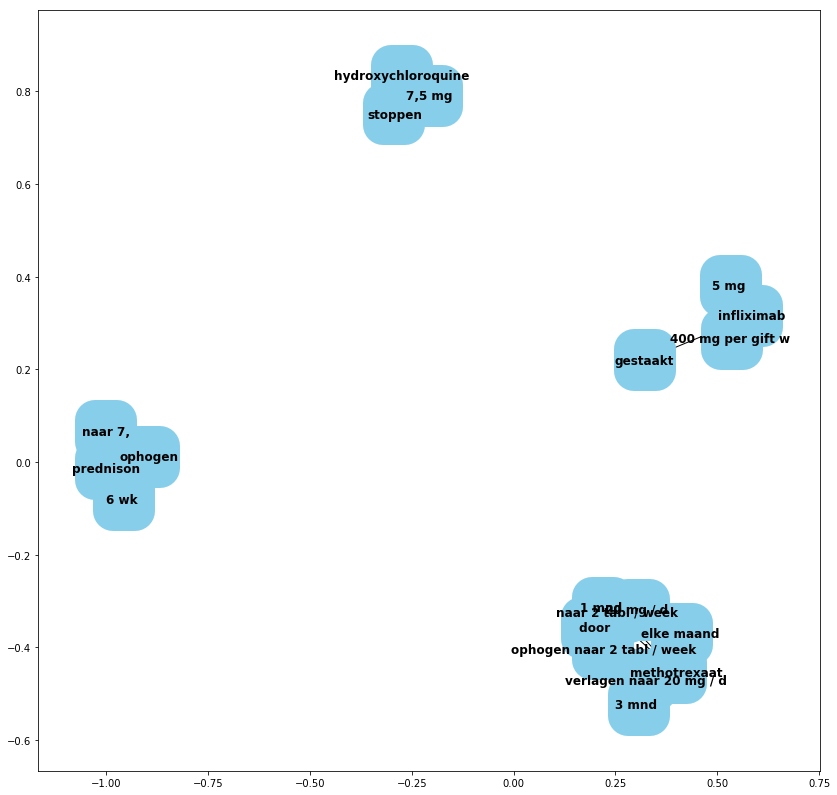

In [11]:
import matplotlib.pyplot as plt

sent = 'tzc gestaakt ^opstarten infliximab 5 mg / kg gewicht = 400 mg per gift w 0,2.6 , daarna elke 6 wk ^prednison ophogen naar 7,5 mg ^hydroxychloroquine stoppen ^methotrexaat verlagen naar 20 mg / d , fz ophogen naar 2 tabl / week ^ssz door ^tc over 1 mnd , lab elke maand , controle over 3 mnd ^op verzoek van pt icc fysiotherapeut en ergotherapeut ^ ^pm hep b dna volgen '
plt = cp.createSimpleNetwork(sent)

plt.draw()
plt.savefig('NetworkFeatures.png')

# Build the Pipeline

## Write to new dataframe

### 1. First time? -> Process TypoVal file

In [ ]:
df_auto = pd.read_csv(r'output_files/DF_typoValidation.csv', index_col=0, sep="|", na_values=['NA'])[['ID', 'PATNR', 'XANTWOORD', 'DATUM']]

# Correct DF_auto
pc_df = em.Processing(df_auto)
pc_df.getDictCutOff()
df_auto, l_typo_found = pc_df.typoProcessing('XANTWOORD')
#df_auto = df_auto.sample(frac=0.5, replace=True, random_state=777)
df_auto.to_csv(r'output_files/DF_TypoVal_proc.csv', sep='|', index=True)

### 2. Not first time: Read processed TypoVal file

In [ ]:
import pandas as pd
df_auto = pd.read_csv(r'output_files/DF_TypoVal_proc.csv', index_col=0, sep="|", na_values=['NA'])
df_auto.head()

In [2]:
df_annotated_man = pd.read_csv(r'output_files/GoudenStandaard_FeatureExtraction2.csv', index_col=2, header=29, sep="|", na_values=['NA'])
df_annotated_man = df_annotated_man.dropna(thresh=5)
df_annotated_man

#print(len(a8))

#print(len(np.intersect1d(a7, a8)))

,groepsnaam gebruikt,groepnaam gebruikt voor voorschrift,PATNR,DATUM,XANTWOORD,Unnamed: 6,Unnamed: 7,voorschrift,actie (change status),drug,freqeuncy,sterkte,form,route,dosering,duur,datum,opmerking,Unnamed: 19
147.0,#REF!,NaN,1082790.0,2013-11-06 00:00:00+00:00,ad 1 . ihkv improved : stop leflunomide . nog ...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165.0,#REF!,NaN,9222396.0,2015-04-01 00:00:00+00:00,- arcoxia stop - gastroscopie staat gepland 2...,start abatacept,NaN,1,start,abatacept,NaN,NaN,NaN,NaN,NaN,NaN,direct,dosering onduidelijk,start abatacept
165.0,#REF!,NaN,9222396.0,2015-04-01 00:00:00+00:00,- arcoxia stop - gastroscopie staat gepland 2...,start depomedrol 80mg i.m.,NaN,1,start,depomedrol,NaN,80mg,NaN,i.m.,NaN,eenmalig,direct,NaN,start depomedrol 80 mg i.m. eenmalig
493.0,#REF!,NaN,9388501.0,2011-06-17 00:00:00+00:00,"mtx spuiten opmaken , daarna mtx staken x h / ...",geen verandering,NaN,2,doorgaan,methotrexaat,NaN,NaN,NaN,NaN,NaN,totdat spuiten op zijn,direct,NaN,doorgaan methotrexaat
861.0,#REF!,NaN,989157.0,2011-12-20 00:00:00+00:00,ena uitsplitsen ( ro / la ? ) tiger ? patiente...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995.0,#REF!,NaN,8413118.0,2012-12-05 00:00:00+00:00,"l . heimans , improved v 14 : humira staop , a...",geen verandering,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007.0,#REF!,FALSE,1099880.0,2012-06-04 00:00:00+00:00,policontrole staat gepland op 7 / 6 plan : was...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025.0,#REF!,NaN,8094276.0,2012-05-31 00:00:00+00:00,iom v gaalen : terug naar uiteindelijke werken...,"methotrexaat 7,5mg/week",NaN,1,NaN,methotrexaat,1x/week,"7,5mg",NaN,NaN,NaN,NaN,direct,NaN,"methotrexaat 7,5mg 1x/week"
1025.0,#REF!,NaN,8094276.0,2012-05-31 00:00:00+00:00,iom v gaalen : terug naar uiteindelijke werken...,start adalimumab,NaN,1,start,adalimumab,NaN,NaN,NaN,NaN,NaN,NaN,na screening,screening volgt nog,start adalimumab na screening
1048.0,#REF!,FALSE,1531035.0,2012-10-29 00:00:00+00:00,heeft op 15 oktober nog bloed laten prikken . ...,geen medicatie,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Extraction Evaluation
###  Split into train & test
1. Select random sample of indices for trainingsset
2. Create subselection according to list of indices

In [3]:
import random

idx = df_annotated_man.index.intersection(df_auto.index).unique()
#print(len(idx))
random.seed(123)
sub_selection = random.sample(list(idx), round(len(df_annotated_man.index.unique())*0.5))
not_included = [x for x in list(idx) if x not in sub_selection]

#print(len(df_annotated_man.index.unique())*0.5)
df_auto_train = df_auto.ix[sub_selection] #set for 
df_train = df_annotated_man.ix[sub_selection] # Man Annotation


# testset

df_test = df_auto.ix[not_included]
#df_test = df_test.drop([0,1,2], axis=0)
df_test.head()
#print(len(df_test))

NameError: name 'df_auto' is not defined

### [Feature Extraction Evaluation] Annotate Sample data for Manual review -> for training

In [ ]:

def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

new_df= pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 
                              'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 
                              'route', 'dosering', 'duur', 'Conclusie'])
teller = 0
proc = em.Processing(df_test)
for index, row in df_test.iterrows():
    l_entry = extractFeatures(row['XANTWOORD']) # ['XANTWOORD'])  row['MedicatieProductNaam']
    for entry in l_entry: 
        new_df = new_df.append({'ID' : row['ID'], 'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], 'Conclusie': entry[16]}, ignore_index=True)
        teller += 1
        
print(teller)
new_df = new_df.replace('None{2}', '', regex=True)
new_df = new_df.replace('None', '', regex=True)
new_df.tail()



### Feature Extraction - Visualize Most frequently prescribed

In [20]:
df = pd.read_csv(r'output_files/DF_annotated_FeatureExtraction_NEW.csv', sep='|', index_col=0)
print(len(df))
print(df['actie'].value_counts().idxmax(), df['actie'].value_counts().max())
print(df['drug'].value_counts().idxmax(), df['drug'].value_counts().max())
print(df['strength_nr'].value_counts().idxmax(), df['strength_nr'].value_counts().max())
print(df['strength_unit'].value_counts().idxmax(), df['strength_unit'].value_counts().max())
print(df['freq_nr'].value_counts().idxmax(), df['freq_nr'].value_counts().max())
# Most occuring freq_unit -> also count wk + w along side week
print(df['freq_unit'].value_counts().idxmax(), df['freq_unit'].value_counts().max()
      + df['freq_unit'].value_counts()[2] + df['freq_unit'].value_counts()[8]) # remove this if new data!


561
start 45
methotrexaat 140
10 18
mg 130
1.0 18
week 40


### Simple Postprocessing of dataframe
1. Exclude entries from certain studies (best & improved -v)
2. Write dataframe to csv file

In [ ]:
cleansed_df = new_df.copy()
exclude_list = ['improved\s?\^?\s?v', 'best\s\:'] # exclude studies + best study ->> TODO Improved verbetern
regexp = re.compile(r'|'.join(exclude_list))
for index, row in cleansed_df.iterrows():
    if regexp.search(row['XANTWOORD']):
        cleansed_df.ix[index, 'Hypothetical'] = True
        cleansed_df.ix[index, 'Conclusie'] = 'geen voorschrift' 
        #print(index, 'yes')
cleansed_df.to_csv(r'output_files/DF_annotated_FeatureExtraction_NEW.csv', sep='|', index=True)

### [LONGITUDINAL EVALUATION]

Uiteindelijk meer patienten

In [12]:
df_reubel = pd.read_csv(r'output_files/DF_REUBEL.csv', index_col=0, sep="|")
#df_reubel[df_reubel['PATNR'] == 2209774][['PATNR', 'DATUM', 'XANTWOORD']]

# Correct DF_auto
pc_df = em.Processing(df_reubel)
pc_df.generateTypoCuttOffPlot(pc_df.getDF())
pc_df.getDictCutOff()
df_reubel, l_typo_found = pc_df.typoProcessing('XANTWOORD')
#df_auto = df_auto.sample(frac=0.5, replace=True, random_state=777)
df_reubel.to_csv(r'featureExtraction/DF_REUBEL_proc.csv', sep='|', index=False)

[48, 4, 1, 1, 7, 72]
[137, 7, 1, 0.0, 5, 660]
[28, 3, 0.0, 0.0, 0.0, 19]
[5, 3, 0.0, 0.0, 0.0, 0.0]
[9, 0.0, 0.0, 0.0, 0.0, 87]
[6, 0.0, 0.0, 0.0, 16, 55]
[79, 11, 2, 10, 7324, 27815]
[26, 5, 44, 8, 67, 804]
[0.0, 1, 0.0, 254, 26186, 121850]
[8, 12, 3, 2, 77, 94]
[25, 2, 6, 14, 1138, 13491]
[18, 12, 6, 60, 339, 29170]
[15, 0.0, 0.0, 6, 109, 1364]
[12, 0.0, 1, 42, 519, 6090]
[47, 35, 27, 7, 52, 79]
[0.0, 0.0, 2, 0.0, 14, 137]
[5, 1, 0.0, 0.0, 14, 3777]
[255, 15, 11, 118, 27, 2314]
[846, 44, 155, 78, 2918, 27334]
[143, 27, 847, 38, 440, 383]
tocilizumab Calculated amount of Typos: 107
abatacept Calculated amount of Typos: 98
depomedrol Calculated amount of Typos: 312
leflunomide Calculated amount of Typos: 152
prednisolon Calculated amount of Typos: 157
certolizumab Calculated amount of Typos: 29
prednison Calculated amount of Typos: 874
hydroxychloroquine Calculated amount of Typos: 48
adalimumab Calculated amount of Typos: 46
infliximab Calculated amount of Typos: 20
methotrexaat Calcu

In [30]:
#pc_df.getDictCutOff()
#df_reubel2 = pd.read_csv(r'featureExtraction/DF_REUBEL_proc.csv', index_col=0, sep="|")
df_reubel.head()[['XANTWOORD', 'PATNR']]

,XANTWOORD,PATNR
ID,,
97208072,"voorlopig via huisarts , indien contact nodig ...",6727644
97284410,langs liesbeth beaart voor verder voorlichting...,5965148
96987142,uitslag echo besproken ^neemt contact op indie...,1378340
96989777,uitslagen besproken . aangegeven : nu geen reu...,4763844
96904121,indien mantoux goed dan inclusie u act early e...,1378340


In [2]:
df_reuOverlap = pd.read_csv(r'featureExtraction/DF_OVERLAP_METEOR_HIX.csv', index_col=0, sep="|")
df_reubel = pd.read_csv(r'featureExtraction/DF_REUBEL_proc.csv', index_col=0, sep="|")
print(len(df_reubel['PATNR'].unique()))
print(len(df_reubel[df_reubel['PATNR'].isin(df_reuOverlap['PATNR'].unique())]['PATNR'].unique()))
df_reubel = df_reubel[df_reubel['PATNR'].isin(df_reuOverlap['PATNR'].unique())]
df_cand = df_reubel 
df_cand.sort_values(['PATNR', 'DATUM'])
len(df_cand)

NameError: name 'pd' is not defined

In [6]:
import random

df_reuOverlap = pd.read_csv(r'featureExtraction/DF_OVERLAP_METEOR_HIX.csv', index_col=0, sep="|")

df_test = pd.read_csv(r'output_files/DF_test.csv', index_col=0, sep="|")
df_test = df_test[df_test['PATNR'].isin(df_reuOverlap['PATNR'].unique())]

random.seed(400)
pat_selection = random.sample(list(df_test['PATNR'].unique()), round(len(list(df_test['PATNR'].unique()))*0.1))

df_cand = df_test[df_test['PATNR'].isin(pat_selection)]
df_cand.sort_values(['PATNR', 'DATUM'])
len(df_cand)


511

In [ ]:
import random
# Get all of the entries not used in the test set
df_patSamp = df_auto[~df_auto['PATNR'].isin(df_annotated_man['PATNR'].unique())]

random.seed(400)
pat_selection = random.sample(list(df_patSamp['PATNR'].unique()), 10)

# create sample with 10 candidate patients
df_cand = df_patSamp[df_patSamp['PATNR'].isin(pat_selection)]
df_cand.sort_values(['PATNR', 'DATUM'])
len(df_cand)

In [7]:
###### Get first date from DDRA

df_firstDDRA = pd.read_csv(r'featureExtraction/DF_firstDateFreeText.csv', sep='|', index_col=0, names=['PATNR', 'firstDate'], header=None)
#print(df_firstDDRA.head())
print(df_firstDDRA.loc[4907]['firstDate'])

2011-08-10 00:00:00+00:00


In [62]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

new_df_cand= pd.DataFrame(columns=['index', 'PATNR', 'DATUM', ])
#df_corrected['XANTWOORD'].sample(frac=0.2, random_state=777).head(10).apply(lambda x: extractFeatures(str(x))).tolist()
#print(new_df)
# df_corrected
teller = 0
proc = em.Processing(df_cand)
for index, row in df_cand.iterrows():
    l_entry = cp.extractFeatures(row['XANTWOORD'].lower()) # ['XANTWOORD'])  row['MedicatieProductNaam']

    #print(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieProductNaam'].lower())
    #print(index)
    firstDat = df_firstDDRA.loc[row['PATNR']]['firstDate']
    
    for entry in l_entry: 
        if (len(l_entry) == 1 or (entry[15] >= 0.15 and entry[12] != True)):
            new_df_cand = new_df_cand.append({'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                    'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                    'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                    'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                    'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], 'Conclusie': entry[16], 'Bezdat0': firstDat, 'dosering': str(entry[8])+ ' ' + str(entry[1])+ ' ' + str(entry[2])  }, ignore_index=True)

            teller += 1
        
print(teller)
new_df_cand = new_df_cand.replace('None{2}', '', regex=True)
new_df_cand = new_df_cand.replace('None', '', regex=True)
new_df_cand.tail()


11577


,index,PATNR,DATUM,Bezdat0,Change,Conclusie,Confidence,Continue,Hypothetical,Negation,...,actie,dosering,drug,duur,form,freq_nr,freq_unit,route,strength_nr,strength_unit
11572,99771493,6171261,2017-11-22 00:00:00+00:00,2011-08-26 00:00:00+00:00,None,geen medicatie,NaN,None,None,None,...,None,,None,,None,,,None,,
11573,99766302,7143332,2017-11-14 00:00:00+00:00,2008-04-24 00:00:00+00:00,False,depomedrol 40 mg i.a,0.195,False,False,False,...,None,40 mg,depomedrol,,None,,,i.a,40,mg
11574,99712564,8446602,2017-10-23 00:00:00+00:00,2014-04-03 00:00:00+00:00,True,Verlagen methotrexaat wk 7.5 mg,0.225,False,False,False,...,Verlagen,7.5 mg,methotrexaat,,None,,wk,None,7.5,mg
11575,99767761,1649432,2017-11-22 00:00:00+00:00,2013-03-25 00:00:00+00:00,None,geen medicatie,NaN,None,None,None,...,None,,None,,None,,,None,,
11576,99853674,3232560,2018-01-18 00:00:00+00:00,2011-11-01 00:00:00+00:00,None,geen medicatie,NaN,None,None,None,...,None,,None,,None,,,None,,


In [21]:
#new_df_cand['Bezdat0']

In [63]:
cleansed_df_cand = new_df_cand.copy()
exclude_list = ['improved\s?\^?\s?v', 'best\s\:'] # exclude studies + best study ->> TODO Improved verbetern
regexp = re.compile(r'|'.join(exclude_list))
for index, row in cleansed_df_cand.iterrows():
    if regexp.search(row['XANTWOORD']): 
        cleansed_df_cand.ix[index, 'Hypothetical'] = True
        cleansed_df_cand.ix[index, 'Conclusie'] = 'geen voorschrift' 
    elif cleansed_df_cand.ix[index, 'Conclusie'] == 'geen voorschrift':
        cleansed_df_cand.ix[index, 'drug'] = None
        cleansed_df_cand.ix[index, 'actie'] = None
        cleansed_df_cand.ix[index, 'dosering'] = None
    
    
"""
elif (cleansed_df_cand.ix[index, 'actie'] == None) and cleansed_df_cand.ix[index, 'drug'] != None:
        cleansed_df_cand.ix[index, 'actie'] = 'start' # assumption?
"""
    # 
#cleansed_df_cand[['PATNR', 'DATUM', 'Bezdat0', 'drug', 'actie']].head(10)
#print(index, 'yes')
#cleansed_df_cand.sort_values(['PATNR', 'DATUM']).to_csv(r'output_files/DF_LONG_candidates.csv', sep='|', index=True)
#cleansed_df_cand['PATNR', 'DATUM', 'Bezdat0', 'drug', 'actie']

G:\newAnacondaG\modules\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
G:\newAnacondaG\modules\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
G:\newAnacondaG\modules\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.
G:\newAnacondaG\modules\lib\site-p

"\nelif (cleansed_df_cand.ix[index, 'actie'] == None) and cleansed_df_cand.ix[index, 'drug'] != None:\n        cleansed_df_cand.ix[index, 'actie'] = 'start' # assumption?\n"

#### Improving Filteringen
cleansed_df_cand filtering -> later pas filteren. 

In [10]:
#df_firstDDRA

In [11]:
df_MV = pd.read_csv(r'output_files/DF_MV.csv', index_col=0, sep="|", na_values=['NA'])

G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,7,8,10,12,16,20,22,25,26,27,29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
print(len(cleansed_df_cand['PATNR'].unique()))

776


In [66]:
from acronyms import ACRONYM_MAP, MEDICINE
import time
#new_df.sort_values(['PATNR', 'DATUM']).groupby('PATNR')
l_excludeEarlyPat = []

df_firstDDRA = pd.read_csv(r'featureExtraction/DF_firstDateFreeText.csv', sep='|', index_col=0, names=['PATNR', 'firstDate'], header=None)
#print(df_firstDDRA.head())
l_excludeEarlyPat.extend(list(df_firstDDRA[(pd.to_datetime(df_firstDDRA['firstDate'])<(pd.to_datetime('2011-04-29')+timedelta(days=180)))].index.unique()))
print('Number of Excluded entries: ', len(cleansed_df_cand[(cleansed_df_cand['PATNR'].isin(list(l_excludeEarlyPat)))]))

print('Prefilter: ', len(cleansed_df_cand['PATNR'].unique()))
cleansed_df_cand = cleansed_df_cand.drop_duplicates(subset=['PATNR', 'DATUM', 'drug', 'actie'])
cleansed_df_cand = cleansed_df_cand[~(cleansed_df_cand['PATNR'].isin(list(l_excludeEarlyPat)))]
print('Afterfilter: ', len(cleansed_df_cand['PATNR'].unique()))

df_subMV = df_MV[df_MV['patient_id'].isin(cleansed_df_cand['PATNR'].unique())]
print(len(df_subMV))

df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']] = df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']].replace(np.nan, '')
df_subMV = df_subMV[df_subMV['MedicatieGPKOmschrijving'].str.contains('|'.join(MEDICINE), case=False)]

exclude_patients = list(df_subMV[pd.to_datetime(df_subMV['SchemaStartDatumtijd']) <= pd.to_datetime('2011-04-29')+timedelta(days=180)]['patient_id'].unique())

l_excludeEarlyPat.extend(list(df_subMV[df_subMV['patient_id'].isin(exclude_patients)]['patient_id'].unique()))

df_subMV = df_subMV[~(df_subMV['patient_id'].isin(list(l_excludeEarlyPat)))]
cleansed_df_cand = cleansed_df_cand[~(cleansed_df_cand['PATNR'].isin(list(l_excludeEarlyPat)))]
print('After filter MV:', len(cleansed_df_cand['PATNR'].unique()))
###  cleansed_df_cand = cleansed_df_cand[(pd.to_datetime(cleansed_df_cand['Bezdat0'])>(pd.to_datetime('2011-04-29')+timedelta(days=180)))]
#cleansed_df_cand[(pd.to_datetime(cleansed_df_cand['Bezdat0'])<(pd.to_datetime('2011-04-29')+timedelta(days=180)))]



Number of Excluded entries:  0
Prefilter:  435
Afterfilter:  435
26961


G:\newAnacondaG\modules\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


After filter MV: 435


In [14]:
cleansed_df_cand[pd.to_datetime(cleansed_df_cand['DATUM'])<=pd.to_datetime('2011-04-29')][['PATNR', 'DATUM']]

,PATNR,DATUM


In [65]:


df_subMV = df_MV[df_MV['patient_id'].isin(cleansed_df_cand['PATNR'].unique())]
#df_subMV = df_subMV.loc[df_subMV['SchemaStartDatumtijd'].between(row['DATUM']- \
#                            timedelta(scope),row['DATUM']+timedelta(scope))]
print(len(df_subMV))
#l_entryY = .apply(extractFeatures(Y_entry_txt))

df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']] = df_subMV[['MedicatieGPKOmschrijving', 'SchemaOmschrijving']].replace(np.nan, '')
df_subMV = df_subMV[df_subMV['MedicatieGPKOmschrijving'].str.contains('|'.join(MEDICINE), case=False)]
exclude_patients = list(df_subMV[pd.to_datetime(df_subMV['SchemaStartDatumtijd']) <= pd.to_datetime('2011-04-29')+timedelta(days=180)]['patient_id'].unique())

print(len(df_subMV['patient_id'].unique()))
print(len(df_subMV[df_subMV['patient_id'].isin(exclude_patients)]['patient_id'].unique()))
#df_subMV = df_subMV.iloc#df_subMV[pd.to_datetime(df_subMV['SchemaStartDatumtijd']) >= pd.to_datetime('2011-04-29')+timedelta(days=180)]

df_subMV.sort_values(['patient_id', 'SchemaStartDatumtijd'])[['patient_id', 'ToedieningsOmschrijving', 'MedicatieGPKOmschrijving', 'SchemaOmschrijving', 'SchemaStartDatumtijd']].head(5)

26961


G:\newAnacondaG\modules\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


357
0


,patient_id,ToedieningsOmschrijving,MedicatieGPKOmschrijving,SchemaOmschrijving,SchemaStartDatumtijd
134652,1002024.0,ORAAL,METHOTREXAAT,1 x per week 15 milligram,2015-08-07 17:26:00
112843,1002024.0,ORAAL,PREDNISOLON,"1 week 1 x per dag 15 milligram, 1 week 1 x pe...",2015-08-17 11:42:00
131496,1002024.0,ORAAL,PREDNISOLON,"1 week 1 x per dag 15 milligram, 1 week 1 x pe...",2015-08-17 11:46:00
134653,1002024.0,ORAAL,METHOTREXAAT,1 x per week 20 milligram,2015-09-16 00:00:00
163376,1002024.0,ORAAL,METHOTREXAAT,1 x per week 15 milligram,2015-09-28 00:00:00


In [67]:


class PostProcessingTable(object):
    def __init__(self, df_MV, df_EMR):
        self.df_EMR = df_EMR.copy()
        self.df_MV = df_MV.copy()
        #self.df_MV['SchemaStartDatumtijd'] = pd.DatetimeIndex(pd.to_datetime(self.df_MV['SchemaStartDatumtijd'])).tz_localize('UTC')
        #self.df_EMR['DATUM'] = pd.DatetimeIndex(pd.to_datetime(self.df_EMR['DATUM'])).tz_localize('UTC')
        self.df_EMR = self.df_EMR.reset_index()
        self.new_df = pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur', 'Conclusie'])
        
        
    def nearest(self, items, pivot):
        """
        Get item from list, closest to the pivot
        """
        return min(items, key=lambda x: abs(x - pivot))
    
    def getDF(self):
        return self.new_df
    
    def merge(self, ix, row, l_rows_del):
        # actie = start bij MV
        row_txt = self.handleStickyChars(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieGPKOmschrijving'].lower())
        
        l_features = cp.extractFeatures(row_txt)
        #print(l_features.replace(np.nan, ''))
        entry = l_features[0]
        firstDat = self.df_MV[self.df_MV['patient_id']==row['patient_id']]['SchemaStartDatumtijd'].min()
        self.new_df = self.new_df.append({'index' : ix, 'ID' : str(len(self.new_df)), 'DATUM' :  row['SchemaStartDatumtijd'], 'PATNR' : row['patient_id'], 'XANTWOORD' : row_txt, 'drug' : entry[0], 
                                    'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                    'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                    'form': entry[9], 'actie': 'Start|Continue', 'Continue': entry[11], 'Hypothetical': entry[12], 
                                    'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], 'Conclusie': entry[16], 'Bezdat0': firstDat, 'dosering': str(entry[8])+ ' ' + str(entry[1])+ ' ' + str(entry[2])  }, ignore_index=True)
        #print(l_features[0])
        #print(l_features[0][0])
        return
    
    def handleStickyChars(self, text):
        """
        At first this function surrounds all sticky characters with spaces.
        This is ultimately to prevent the algorithm from misinterpreting
        text (like medication or negation): mtx.depo -> mtx . depo 
        
        After the splitting on sticky characters the algorithm will 
        assemble the special cases where a sticky character is allowed! 
        
        Dots and commas between integers will be put together: 
            7 , 5 mg -> 7,5 mg (pattern 3 -> aka pat3)
            
        Medication with special/sticky characters in them will be assembled
            as well:
            (1) cortico ' s -> cortico's (yes)
            (2) methotrexaat ' -> methotrexaat ' (no)
            (3) anti - tnf -> anti-tnf (yes) (pat2)
            (4) mtx - sasp -> mtx - sasp (no)
            
        Only medications that stick to a hyphen will be seperated with spaces: 
            mtx-infliximab -> mtx - infliximab 
        
        The function also appends an whitespace to digits: 5mtx -> 5 mtx. 
        Except when there is an acronym like anti-il1 which consists of 
        an integer! (pattern 1 -> aka pat1)
        
        Acronyms like o.s and i.v. are preserved in this function aswell.
        (pattern 4)
            
        Finally, this function removes all of the duplicate whitespace. 
        """
        sticky_chars = r'([!#?,.:";@\-\+\\/&=$\]\[<>\'\*`â€™\(\)])'
        words = text.split() 
        new_words = []
        for word in words:
            new_words.append(re.sub(sticky_chars, r' \1 ', word))
        new_text = ""
        for word in new_words:
            pat1 = re.compile(r'([a-z]{1,})(\d{1,})')
            for r1, r2 in pat1.findall(word):
                if r1+r2 not in MEDICINE and r1+r2 not in ACRONYM_MAP.keys():
                    word = re.sub(r1+r2," " + r1 + " " + r2 + " ", word)
            pat2 = re.compile(r'([a-z]{1,})\s'+sticky_chars+'\s([a-z]{1,})')
            for r1, r2, r3 in pat2.findall(word):
                if r1+r2+r3 in MEDICINE or r1+r2+r3 in ACRONYM_MAP.keys():
                    word = re.sub(r1 + " " + r2 + " " + r3," " + \
                                  r1+r2+r3+ " ", word)
            pat3 = re.compile(r'(\d{1,})\s([,.])\s(\d{1,})')
            for r1, r2, r3 in pat3.findall(word):
                word = re.sub(r1 + " " + r2 + " " + r3, " "+ \
                              r1+r2+r3 + " ", word)
            word = re.sub(r'(\d{1,})([a-z]{1,})', " " + r'\1' + ' ' + r'\2' " ", word)
            pat4 = re.compile(r'^([a-z])\s(\.)\s([a-z])\s?(\.)?\s?$')
            for r1, r2, r3, r4 in pat4.findall(word):
                word = re.sub(r1 + " " + r2 + " " + r3 + " "*len(r4) + r4, " "+ \
                              r1+r2+r3+r4 + " ", word)
            new_text += word + " "
        new_text = re.sub(r'\s+', ' ', new_text)      
        return new_text
    
    def clean(self):
        """
        Clean all of the None's
        """
        self.new_df = self.new_df.replace('None{2}', '', regex=True)
        self.new_df = self.new_df.replace('None', '', regex=True)
        return
        
post1_df = PostProcessingTable(df_subMV, cleansed_df_cand)

l_rows_del = [] 
for index, row in df_subMV.iterrows():
    l_rows_del = post1_df.merge(index, row, l_rows_del)
#print(l_rows_del)    

post1_df.clean()
post1_df.getDF().head()

,index,ID,PATNR,DATUM,XANTWOORD,drug,actie,freq_nr,freq_unit,strength_nr,...,route,dosering,duur,Conclusie,Bezdat0,Change,Confidence,Continue,Hypothetical,Negation
0,130,0,6291228.0,2013-06-11 00:00:00,1 x per dag 5 milligram prednisolon,None,Start|Continue,,,,...,None,,,geen medicatie,2012-09-24 00:00:00,None,NaN,None,None,None
1,135,1,5555164.0,2013-05-30 00:00:00,1 x per dag 5 milligram prednisolon,None,Start|Continue,,,,...,None,,,geen medicatie,2012-12-24 00:00:00,None,NaN,None,None,None
2,157,2,1213001.0,2013-06-05 00:00:00,1 x per week 15 milligram methotrexaat,methotrexaat,Start|Continue,1,week,15,...,None,15 milligram,,methotrexaat 1 week 15 milligram,2012-08-28 00:00:00,False,0.225,False,False,False
3,170,3,7977526.0,2013-08-14 00:00:00,1 x per dag 10 milligram prednisolon,None,Start|Continue,,,,...,None,,,geen medicatie,2012-03-29 00:00:00,None,NaN,None,None,None
4,215,4,6581337.0,2013-06-11 08:00:00,1 x per dag 35 milligram prednisolon,None,Start|Continue,,,,...,None,,,geen medicatie,2012-01-06 00:00:00,None,NaN,None,None,None


In [209]:
post1_df.getDF()[pd.to_datetime(post1_df.getDF()['DATUM'])<=pd.to_datetime('2011-04-29')][['PATNR', 'DATUM']]

,PATNR,DATUM


## Merge overlapping entries with Medicator

In [68]:
scope =7
rows_overlap = []
df_merge = pd.DataFrame(columns=['index', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur', 'Conclusie', 'Bezdat0', 'Change', 'Confidence', 'Continue', 'Hypothetical', 'Negation'])
for index, row in post1_df.getDF().iterrows():
    #print(index, row)
    df_patEMR = cleansed_df_cand[(cleansed_df_cand['PATNR'] == row['PATNR']) & (cleansed_df_cand['drug'] == row['drug'])]
    date = pd.to_datetime(row['DATUM'])
    df_patEMR = df_patEMR[pd.to_datetime(df_patEMR['DATUM']).between(date- \
                                    timedelta(scope),date+timedelta(scope))]
    d_new = row.to_dict()
    if len(df_patEMR) > 0:
        row_EMR = df_patEMR.iloc[0]
        firstDat = df_cand[df_cand['PATNR']==row['PATNR']]['DATUM'].min()
        d_new.update({'index2' : row_EMR['index'], 'DATUM2' : row_EMR['DATUM'], 'PATNR2' : row_EMR['PATNR'], 'XANTWOORD2' : row_EMR['XANTWOORD'], 'drug2' : row_EMR['drug'], 
                            'strength_nr2': row_EMR['strength_nr'], 'strength_unit2' : row_EMR['strength_unit'], 'freq_nr2' : row_EMR['freq_nr'], 'freq_unit2' : row_EMR['freq_unit'], 
                            'route2': row_EMR['route'], 'duur2' : row_EMR['duur'], 'dosering2': row_EMR['dosering'],
                            'form2': row_EMR['form'], 'actie2': row_EMR['actie'], 'Continue2': row_EMR['Continue'], 'Hypothetical2': row_EMR['Hypothetical'], 
                            'Change2': row_EMR['Change'], 'Negation2': row_EMR['Negation'], 'Confidence2': row_EMR['Confidence'], 'Conclusie2': row_EMR['Conclusie'], 'Bezdat02': firstDat, 'dosering2': row_EMR['dosering']})
        df_merge = df_merge.append(d_new, ignore_index=True)
        #print()
        rows_overlap.append([row_EMR['index'], row_EMR['Conclusie']])
    else : 
        entry = [None]*18
        d_new.update({'index2' : index, 'DATUM2' : None, 'PATNR2' : None, 'XANTWOORD2' : None, 'drug2' : entry[0], 
                    'strength_nr2': str(entry[1]), 'strength_unit2' : str(entry[2]), 'freq_nr2' : str(entry[3]), 'freq_unit2' : str(entry[4]), 
                    'route2': entry[5], 'duur2' : str(entry[6])+' '+str(entry[7]), 'dosering2': entry[8],
                    'form2': entry[9], 'actie2': entry[10], 'Continue2': entry[11], 'Hypothetical2': entry[12], 
                    'Change2': entry[13], 'Negation2': entry[14], 'Confidence2': entry[15], 'Conclusie2': entry[16], 'Bezdat02': None, 'dosering2': None})
        df_merge = df_merge.append(d_new, ignore_index=True)
    #print(df_patEMR)
    #cleansed_df_cand[(pd.to_datetime(cleansed_df_cand['Bezdat0'])>(pd.to_datetime('2011-04-29')+timedelta(days=7)))]
#print(rows_overlap)
print('Nr of rows that match: ', len(rows_overlap))

Nr of rows that match:  2167


## Merge overlapping entries with Joint
Scope = 1 month

In [69]:
df_joints = pd.read_csv(r'featureExtraction/DF_gewrichtspop.csv', sep='|', index_col=0)
#print(df_joints['STELLING'].unique())

l_distance = pd.DataFrame(columns=['PATNR', 'DIFF'])
scope =180
rows_overlap_joint = []
df_mergeJ = pd.DataFrame(columns=['ID_DAS', 'DATUM_DAS'])
for index, row in cleansed_df_cand.iterrows():
    #print(index, row)
    df_patEMR = df_joints[(df_joints['PATNR'] == row['PATNR'])]
    date = pd.to_datetime(row['DATUM'])
    df_patEMR = df_patEMR[pd.to_datetime(df_patEMR['DATUM']).between(date- \
                                    timedelta(scope), date+timedelta(1))]
    d_new = row.to_dict()
    
    if len(df_patEMR) > 0:
        row_EMR = df_patEMR
        #print(len(row_EMR))
        # only append DAS or other gewrichtspop values
        d_new.update({'ID_DAS' : row_EMR.index, 'DATUM_DAS' : row_EMR['DATUM'], 'DATUM': date})
        for ix , row_stel in row_EMR[['STELLING', 'NAAM', 'XANTWOORD']].iterrows():
            #print(col_joint, '|'.join(row_EMR['XANTWOORD']))
            l_distance = l_distance.append({'DIFF': (pd.to_datetime(date) - pd.to_datetime(row_EMR['DATUM'])).dt.days.iloc[0], 'PATNR': row_EMR['PATNR'].iloc[0]}, ignore_index=True)
            if row_stel['NAAM'] == 'Metingen':
                try:
                    match = re.findall(r'VALUE1=(\d*\,?\d+?)\"?', row_stel['XANTWOORD'])[0]
                except :
                    match = row_stel['XANTWOORD']
                d_new.update({str(row_stel['STELLING'])+ '_' + str(row_stel['NAAM']) : match})
            else:  
                d_new.update({str(row_stel['STELLING'])+ '_' + str(row_stel['NAAM']) : row_stel['XANTWOORD']})
        df_mergeJ = df_mergeJ.append(d_new, ignore_index=True)
        #print()
        rows_overlap_joint.append(row_EMR.index)
    else : 
        entry = [None]*18
        d_new.update({'index_DAS' : '', 'DATUM_DAS' : df_patEMR['DATUM'], 'DATUM': date})
        df_mergeJ = df_mergeJ.append(d_new, ignore_index=True)
        #l_distance = l_distance.append({'DIFF': (pd.to_datetime(date) - pd.to_datetime(row_EMR['DATUM'])).dt.days, 'PATNR': row_EMR['PATNR']}, ignore_index=True)
print('Nr of rows that match: ', len(rows_overlap_joint))

G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,17,18,33,34,35,41,43,47,48,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Nr of rows that match:  6644


### Substantiate scope choice

Text(0, 0.5, 'Occurence')

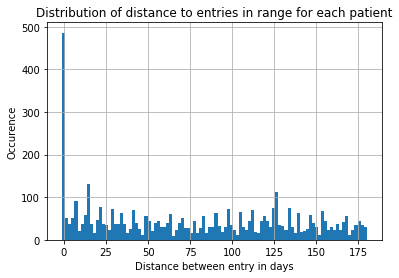

In [106]:
#title = 
l_distance = l_distance.drop_duplicates(subset=['PATNR', 'DIFF'])
ax = pd.to_numeric(l_distance['DIFF']).hist(bins=100)
ax.set_title("Distribution of distance to entries in range for each patient")
ax.set_xlabel("Distance between entries in days")
ax.set_ylabel("Occurence")

Text(0, 0.5, 'Occurence')

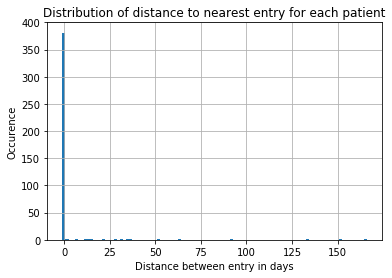

In [105]:
#title = 
l_distance2 = l_distance.sort_values(by='DIFF').drop_duplicates(subset=['PATNR'])
ax = pd.to_numeric(l_distance2['DIFF']).hist(bins=100)
ax.set_title("Distribution of distance to nearest entry for each patient")
ax.set_xlabel("Distance between entries in days")
ax.set_ylabel("Occurence")

In [ ]:
df_mergeJ[~(df_mergeJ['DAS 44_Metingen'].isna())].head()[['DAS 44_Metingen', 'DAS 28_Metingen', 'PATNR', 'XANTWOORD', 'DATUM', 'DATUM_DAS']]

In [ ]:
#df_merge[~(df_merge['actie'].isna())][['Conclusie', 'actie', 'drug2']].head(200)
#df_joints = pd.read_csv(r'output_files/DF_gewrichtspop.csv', sep='|', index_col=0)
#df_joints.head()
#df_joints[df_joints['STELLING']=='DAS 44(3)']['XANTWOORD']
#print(len(cleansed_df_cand['PATNR'].unique()))
#print(len(cleansed_df_cand[cleansed_df_cand['PATNR'].isin(df_joints['PATNR'].unique())]['PATNR'].unique()))
#print(len(cleansed_df_cand.merge(df_joints, on=['PATNR'], how='left')))
#cleansed_df_cand.merge(df_joints, on=['PATNR'], how='left')

In [110]:
#cleansed_df_cand.columns = [str(col) + '2' for col in cleansed_df_cand.columns]
#cleansed_df_cand['DATUM']
# Filter on overlapping entries niet in overlappend -> want anders mergen!!
cleansed_df_cand = cleansed_df_cand.loc[~(cleansed_df_cand["index"].isin(rows_overlap[x][0] for x in range(len(rows_overlap))) & 
                               cleansed_df_cand["Conclusie"].isin(rows_overlap[x][1] for x in range(len(rows_overlap))))]
df_merge['DATUM'] = pd.to_datetime(df_merge['DATUM'], format="%Y-%m-%d")
cleansed_df_cand['DATUM'] = pd.to_datetime(cleansed_df_cand['DATUM'], format="%Y-%m-%d")

#df_ult = pd.DataFrame(index = col_list)
df_ult = pd.concat([cleansed_df_cand, df_merge], ignore_index=True)
#df_ult['DATUM2'] = pd.to_datetime(df_ult['DATUM2'], format="%Y-%m-%d")
#df_merge['DATUM']
df_ult.head()

G:\newAnacondaG\modules\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


,Bezdat0,Bezdat02,Change,Change2,Conclusie,Conclusie2,Confidence,Confidence2,Continue,Continue2,...,freq_unit,freq_unit2,index,index2,route,route2,strength_nr,strength_nr2,strength_unit,strength_unit2
0,2012-09-13 00:00:00+00:00,NaN,False,NaN,geen voorschrift,NaN,0.050,NaN,False,NaN,...,,NaN,97284410,NaN,None,NaN,,NaN,,NaN
1,2011-11-08 00:00:00+00:00,NaN,None,NaN,geen medicatie,NaN,NaN,NaN,None,NaN,...,,NaN,96987142,NaN,None,NaN,,NaN,,NaN
2,2011-11-08 00:00:00+00:00,NaN,None,NaN,geen medicatie,NaN,NaN,NaN,None,NaN,...,,NaN,96904121,NaN,None,NaN,,NaN,,NaN
3,2011-12-06 00:00:00+00:00,NaN,False,NaN,depomedrol 80 mg,NaN,0.150,NaN,False,NaN,...,,NaN,96924852,NaN,None,NaN,80,NaN,mg,NaN
4,2012-07-12 00:00:00+00:00,NaN,False,NaN,geen verandering,NaN,0.195,NaN,True,NaN,...,,NaN,97521454,NaN,s.c,NaN,,NaN,,NaN


## REMOVE PRED & DEPO?

In [108]:
#df_ult.sort_values(by=['PATNR', 'DATUM'])[['index', 'PATNR', 'drug', 'DATUM' ,'actie']].head()
#df_ult = df_ult[~((~df_ult['actie'].isna()) & (df_ult['drug']).isna())] # dit evt. weghalen
#print(len(df_ult['PATNR'].unique()))
df_ult = df_ult[~(df_ult['drug'].isin(['prednison', 'depomedrol']))]
print(len(df_ult['PATNR'].unique()))

435


In [ ]:
df_ult.sort_values(by=['PATNR', 'DATUM'])[['index', 'PATNR', 'drug', 'DATUM' ,'actie','XANTWOORD', 'drug2', 'actie2']].to_csv(r'featureExtraction/DF_MERGED_LONG.csv', sep='|', index=True)

In [111]:
#df = pd.DataFrame(columns=['PATNR', 'drug','DATUM', 'actie', 'trigger'])

def appendToDF(row, actie, drug, trigger=''):
    d = {'PATNR' : row['PATNR'], 'drug': drug,'DATUM': row['DATUM'], 'actie': actie, 'trigger' : trigger,
        'index' : row['index'], 'XANTWOORD' : row['XANTWOORD'], 'freq_nr' : row['freq_nr'], 'freq_unit' : row['freq_unit'],
        'strength_nr': row['strength_nr'], 'strength_unit' : row['strength_unit'],  
        'route': row['route'], 'duur' : row['duur'], 'dosering': row['dosering'],
        'form': row['form'], 'Continue': row['Continue'], 'Hypothetical': row['Hypothetical'], 
        'Change': row['Change'], 'Negation': row['Negation'], 'Confidence': row['Confidence'], 'Conclusie': row['Conclusie'], 
        'Bezdat0': row['Bezdat0'], 'index2' : row['index2'], 'DATUM2' : row['DATUM2'], 'PATNR2' : row['PATNR2'], 'XANTWOORD2' : row['XANTWOORD2'], 'drug2' : row['drug2'], 
        'strength_nr2': row['strength_nr2'], 'strength_unit2' : row['strength_unit2'], 'freq_nr2' : row['freq_nr2'], 'freq_unit2' : row['freq_unit2'], 
        'route2': row['route2'], 'duur2' : row['duur2'], 'dosering2': row['dosering2'],
        'form2': row['form2'], 'actie2': row['actie2'], 'Continue2': row['Continue2'], 'Hypothetical2': row['Hypothetical2'], 
        'Change2': row['Change2'], 'Negation2': row['Negation2'], 'Confidence2': row['Confidence2'], 'Conclusie2': row['Conclusie2'], 
        'Bezdat02': row['Bezdat02'], 'dosering2': row['dosering2']}
    #print(d)
    return d
def concentrationUpdate(strength_nr, strength_unit, prev_nr='', prev_unit=''):
    if strength_nr != 'None' and strength_unit != 'None':
        return [strength_nr, strength_unit]
    elif strength_nr != 'None':
        return [strength_nr, prev_unit]
    elif strength_unit != 'None':
        return [prev_nr, strength_unit]
    else:
        return [prev_nr, prev_unit]
    
def switchOperation(d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr):
    dmard_stop = 0
    print('DMARDS found: ', len([x for x in DMARD if x in d_cur_drugs.keys()]))
    print(d_cur_drugs, row['drug'])
    if len([x for x in DMARD if x in d_cur_drugs.keys()]) != 0:
        dmard_stop = 1
    for drug in d_cur_drugs:
        l_val = d_trajectories[d_cur_drugs[drug]]
        if drug != row['drug'] and drug != '' and (drug in DMARD or dmard_stop == 0):
            df_drug = df[df['drug']==drug]
            max_date = df_drug[df_drug['DATUM']<=row['DATUM']]['DATUM'].max()
            drug_info = df_drug[df_drug['DATUM']==max_date].iloc[0]
            drug_info['DATUM'] = row['DATUM']
            drug_info['Conclusie'] = 'Stop want ' + row['Conclusie']
            d_trajectories[d_cur_drugs[drug]] = [drug_info['PATNR'], drug, l_val[2], row['DATUM'], drug_info['Bezdat0']]
            new_df = new_df.append(appendToDF(drug_info, 'Stop', drug, 'C: Drug stopped because of switch'), ignore_index=True)
    if dmard_stop == 1:
        [d_cur_drugs.pop(x) for x in DMARD if x in d_cur_drugs.keys()]
        [d_cur_conc.pop(x) for x in DMARD if x in d_cur_conc.keys()]
    else :
        d_cur_drugs = {}
        d_cur_conc = {}
    print(d_cur_drugs)
    
    if row['drug'] not in d_cur_drugs.keys():
        d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
        d_cur_drugs[row['drug']] = key
    d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit']) # only if start
    new_df = new_df.append(appendToDF(row, 'Verandering', row['drug'], ''), ignore_index=True)
    return d_trajectories, d_cur_drugs, d_cur_conc, new_df
    
def medTrajectories(df, new_df):
    d_trajectories = {}
    d_cur_drugs = {}
    d_cur_conc = {}
    l_change = ['Verhogen', 'Verlagen', 'Afbouwen', 'Ophogen']
    for index, row in df.iterrows():
        if row['drug'] != None:
            key = row['drug'] + str(index)
        else : 
            key = 'Nonel'
            #break
        
        str_nr = str(row['strength_nr']).replace(',','.')
        if ' ' in str_nr:
            str_nr = str_nr.split(" ")[0]
        prev_nr = str(row['strength_nr']).replace(',','.')
        if ' ' in prev_nr:
            prev_nr = prev_nr.split(" ")[0]
                
        #print(row['drug'], d_cur_drugs)
        
        if row['drug']==None :
            if len(d_cur_drugs.keys()) > 0:
                print('Unnamed Med named!!')
                for k in d_cur_drugs.keys():
                    l_val = d_trajectories[d_cur_drugs[k]]
                    d_trajectories[d_cur_drugs[k]] = [row['PATNR'], k, l_val[2], row['DATUM'], row['Bezdat0']]
                    new_df = new_df.append(appendToDF(row, 'Continue', k, ''), ignore_index=True)
                    row['drug'] = k
                    #row['conclusie'] = 'geen voorschrift'
            else :
                row['drug'] = ''; 
                row['conclusie'] = 'geen medicatie'
        else :
            # assume continuation
            if len(d_cur_drugs.keys()) > 0:
                for k in d_cur_drugs.keys():
                    l_val = d_trajectories[d_cur_drugs[k]]
                    d_trajectories[d_cur_drugs[k]] = [row['PATNR'], k, l_val[2], row['DATUM'], row['Bezdat0']]
        if (any(str(row['drug']) in s for s in d_cur_drugs.keys()) == False):
            if (row['drug'] == 'med' or row['drug'] == 'medicatie') and row['actie'] != 'start':
                for k in d_cur_drugs.keys():
                    l_val = d_trajectories[d_cur_drugs[k]]
                    d_trajectories[d_cur_drugs[k]] = [row['PATNR'], k, l_val[2], row['DATUM'], row['Bezdat0']]
                    new_df = new_df.append(appendToDF(row, 'Continue', k, ''), ignore_index=True)
                    #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': d_cur_drugs[key],'DATUM': row['DATUM'], 'actie': 'Continue', 'trigger' : '', 'Conclusie' : row['Conclusie']}, ignore_index=True)
                print('Unspecified Med converted!!')
            elif row['actie'] == 'Stop':
                print('SECOND STOP!!')
                #d_trajectories[key] = [row['PATNR'], row['drug'], None, row['DATUM'], row['Bezdat0']]
                new_df = new_df.append(appendToDF(row, row['actie'], row['drug'], 'CONFLICT-> Is al eerder geeindigd'), ignore_index=True)
            elif row['actie'] == 'Start' : # or row['actie'] == 'Start|Continue'
                d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
                d_cur_drugs[row['drug']] = key
                d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit']) # only if start
                new_df = new_df.append(appendToDF(row, 'Start', row['drug'], ''), ignore_index=True)
                #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': row['drug'],'DATUM': row['DATUM'], 'actie': 'Start', 'trigger' : '', 'Conclusie' : row['Conclusie']}, ignore_index=True)
            elif row['actie'] == 'Switch':
                d_trajectories, d_cur_drugs, d_cur_conc, new_df = switchOperation(
                        d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
                
            elif row['actie'] == 'Start|Continue':
                conclusion= 'Start'
                trig = ''
                if row['drug'] in d_cur_conc.keys():
                    prev_nr = d_cur_conc[row['drug']][0].replace(',','.')
                    if str_nr != 'None' and prev_nr != '' and ' ' not in prev_nr:
                        if float(str_nr) > float(prev_nr):
                            conclusion = 'Verhoging'
                            trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
                        elif float(str_nr) < float(prev_nr):
                            conclusion = 'Verlaging'
                            trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
                d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
                d_cur_drugs[row['drug']] = key
                d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'])
                new_df = new_df.append(appendToDF(row, conclusion, row['drug'], ''), ignore_index=True)
            elif row['actie'] == 'Continue' or str(row['actie']) in l_change:
                print('Continue before start!!')
                d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
                d_cur_drugs[row['drug']] = key
                d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'])
                new_df = new_df.append(appendToDF(row, row['actie'], row['drug'], 'CONFLICT->' + row['actie'] + ' voor start!'), ignore_index=True)
                #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': row['drug'],'DATUM': row['DATUM'], 'actie': row['actie'], 'trigger' : 'CONFLICT->' + row['actie'] + ' voor start!', 'Conclusie' : row['Conclusie']}, ignore_index=True)
            #print(d_cur_drugs)
        else :
            if row['actie'] == 'Stop': # niet eerder gestopt!
                l_val = d_trajectories[d_cur_drugs[row['drug']]]
                d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
                del d_cur_drugs [row['drug']]
                del d_cur_conc [row['drug']]
                new_df = new_df.append(appendToDF(row, row['actie'], row['drug'], ''), ignore_index=True)
                #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': row['drug'],'DATUM': row['DATUM'], 'actie': row['actie'], 'trigger' : '', 'Conclusie' : row['Conclusie']}, ignore_index=True)
            elif row['actie'] == 'Start': # al eerder gestart
                print('Double Start!!')
                #d_trajectories[key] = [row['PATNR'], row['drug'], row['DATUM'], None, row['Bezdat0']]
                d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
                new_df = new_df.append(appendToDF(row, 'Continue', row['drug'], 'CONFLICT-> Tweede start is gecorrigeerd met een Continue!'), ignore_index=True)
                #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': row['drug'],'DATUM': row['DATUM'], 'actie': row['actie'], 'trigger' : 'CONFLICT-> Is al eerder gestart', 'Conclusie' : row['Conclusie']}, ignore_index=True)
            elif row['actie'] == 'Continue':
                d_cur_conc[row['drug']] = concentrationUpdate(str_nr, row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
                l_val = d_trajectories[d_cur_drugs[row['drug']]]
                d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
                new_df = new_df.append(appendToDF(row, 'Continue', row['drug'], ''), ignore_index=True)
                #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': row['drug'],'DATUM': row['DATUM'], 'actie': 'Continue', 'trigger' : '', 'Conclusie' : row['Conclusie']}, ignore_index=True)
            elif row['actie'] == 'Start|Continue':
                #print(d_trajectories)
                l_val = d_trajectories[d_cur_drugs[row['drug']]]
                d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
                #print(d_cur_conc, d_cur_drugs)
                prev_nr = d_cur_conc[row['drug']][0].replace(',','.')
                
                if str_nr != 'None' and prev_nr != '' and str_nr != '' and prev_nr != None and ' ' not in prev_nr:
                    if float(str_nr) > float(prev_nr):
                        conclusion = 'Verhoging'
                        trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
                    elif float(str_nr) < float(prev_nr):
                        conclusion = 'Verlaging'
                    elif row['Change']:
                        conclusion = 'Verandering'
                        d_trajectories, d_cur_drugs, d_cur_conc, new_df = switchOperation(
                            d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
                        break
                    else:
                        conclusion = 'Continue'
                else : 
                    conclusion = 'Continue'
                new_df = new_df.append(appendToDF(row, conclusion, row['drug'], ''), ignore_index=True)
                d_cur_conc[row['drug']] = concentrationUpdate(row['strength_nr'], row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
            elif row['actie'] == 'Verandering':
                d_trajectories, d_cur_drugs, d_cur_conc, new_df = switchOperation(
                        d_trajectories, d_cur_drugs, d_cur_conc, df, new_df, row, key, str_nr)
            elif str(row['actie']) in (l_change):
                #print('yes')
                l_val = d_trajectories[d_cur_drugs[row['drug']]]
                d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
                new_df = new_df.append(appendToDF(row, 'Continue', row['drug'], 'CONFLICT-> Tweede start is gecorrigeerd met een Continue!'), ignore_index=True)
                #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': row['drug'],'DATUM': row['DATUM'], 'actie': row['actie'], 'trigger' : '', 'Conclusie' : row['Conclusie']}, ignore_index=True)
            elif row['actie'] == None and row['drug'] != None:
                # LOCF -> actie bepalen aan de hand van voorgaande informatie drug 
                # -> daarom wordt er de laatste informatie opgehaald bij prev_nr
                l_val = d_trajectories[d_cur_drugs[row['drug']]]
                d_trajectories[d_cur_drugs[row['drug']]] = [row['PATNR'], row['drug'], l_val[2], row['DATUM'], row['Bezdat0']]
                prev_nr = d_cur_conc[row['drug']][0].replace(',','.')
                
                if str_nr != 'None' and str_nr != '' and prev_nr != '' and prev_nr != None and ' ' not in prev_nr:
                    print(prev_nr, str_nr)
                    if float(str_nr) > float(prev_nr):
                        conclusion = 'Verhoging'
                        trig = 'CONFLICT->' + str(row['actie'])+ ' voor start!'
                    elif float(str_nr) < float(prev_nr):
                        conclusion = 'Verlaging'
                    else:
                        conclusion = 'Continue'
                else : 
                    conclusion = 'Continue'
                new_df = new_df.append(appendToDF(row, conclusion, row['drug'], ''), ignore_index=True)
                d_cur_conc[row['drug']] = concentrationUpdate(row['strength_nr'], row['strength_unit'], d_cur_conc[row['drug']][0],  d_cur_conc[row['drug']][1])
                print('Actie unknown: ', index, row['drug'], row['DATUM'], '\tConverted to -> ', conclusion)

        
            #if row['']
            #print(row['drug'], ' op ',  row['DATUM'], 'Eerder gestart')
        if None in d_cur_drugs:
            print('None', row['actie'])
    return new_df, d_trajectories

def formatTable(df, d_traject):
    for key, val in d_traject.items():
        df = df.append({'ID': key, 'PATNR' : val[0], 'drug' : val[1], 'BeginDat': val[2], 'EindDat': val[3], 'Bezdat0': val[4]}, ignore_index = True)
    return df
df_endTable = pd.DataFrame(columns=['index','ID', 'PATNR', 'drug', 'DATUM', 'strength_nr2'])
df_tableNetwork = pd.DataFrame(columns=['PATNR', 'drug', 'BeginDat', 'EindDat'])
#df_pat = pd.DataFrame({'PATNR' : [1,2]})
for patnr in list(df_ult['PATNR'].unique()):
    
    df_pat = df_ult[df_ult['PATNR']==patnr].sort_values(by=['PATNR', 'DATUM']) 
    df_endTable, d_traject = medTrajectories(df_pat, df_endTable)
    df_tableNetwork = formatTable(df_tableNetwork, d_traject)
    #print(row[['index', 'PATNR', 'drug', 'DATUM' ,'actie']])
    #df_pat = df_ult[df_ult['PATNR']==row['PATNR']]
df_endTable.head()

Continue before start!!
Unnamed Med named!!
Actie unknown:  0 methotrexaat 2012-10-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  729 methotrexaat 2012-11-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1020 methotrexaat 2013-01-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1636 methotrexaat 2013-06-06 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1819 methotrexaat 2014-01-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  498 tocilizumab 2012-01-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  493 tocilizumab 2012-01-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1 tocilizumab 2012-02-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  553 tocilizumab 2012-02-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  525 tocilizumab 2012-03-29 00:00:00 	Converte

Unnamed Med named!!
Actie unknown:  1045 hydroxychloroquine 2013-05-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1133 prednison 2013-07-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1496 prednison 2013-09-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1428 etanercept 2013-09-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1858 etanercept 2013-10-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3122 etanercept 2014-06-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  232 etanercept 2014-12-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3668 etanercept 2015-08-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3907 methotrexaat 2016-01-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4327 etanercept 2016-04-04 00:00:00 	Converted to ->  Continue
Dou

Actie unknown:  2364 tocilizumab 2014-08-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3134 tocilizumab 2014-12-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  227 tocilizumab 2014-12-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2878 tocilizumab 2014-12-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2879 tocilizumab 2014-12-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2883 tocilizumab 2014-12-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4896 sulfasalazine 2016-11-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5035 sulfasalazine 2017-02-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5095 sulfasalazine 2017-04-19 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Unnamed

Unnamed Med named!!
Actie unknown:  24 methotrexaat 2015-06-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  297 methotrexaat 2015-07-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Double Start!!
Unnamed Med named!!
Actie unknown:  3959 sulfasalazine 2016-02-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4493 sulfasalazine 2016-06-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Continue before start!!
Unnamed Med named!!
DMARDS found:  3
{'methotrexaat': 'methotrexaat4057', 'hydroxychloroquine': 'hydroxychloroquine10725', 'sulfasalazine': 'sulfasalazine10726', 'prednison': 'prednison4957', 'etanercept': 'etanercept11106'} etanercept
{'prednison': 'prednison4957', 'etanercept': 'etanercept11106'}
Unnamed Med named!!
Actie unknown:  1514 methotrexaat 2013-12-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2539 hydroxychloroquine 2014-03-03 00:00:00 	Converted to -> 

Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1944 leflunomide 2014-03-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2368 leflunomide 2014-06-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2371 leflunomide 2014-06-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2990 methotrexaat 2014-07-10 00:00:00 	Converted to ->  Continue
Double Start!!
Unnamed Med named!!
Actie unknown:  2749 adalimumab 2014-09-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2752 adalimumab 2014-11-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2882 adalimumab 2014-11-26 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3119 adalimumab 2014-12-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2889 adalimumab 2015-01-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unk

Unnamed Med named!!
Actie unknown:  4677 adalimumab 2016-05-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4651 adalimumab 2016-07-07 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Actie unknown:  5007 hydroxychloroquine 2016-12-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5010 hydroxychloroquine 2016-12-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5012 hydroxychloroquine 2016-12-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4910 hydroxychloroquine 2016-12-06 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5156 hydroxychloroquine 2016-12-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4861 hydroxychloroquine 2017-01-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5214 hydroxychloroquine 2017-01-31 00:00:00 	Converted to ->

Unnamed Med named!!
Actie unknown:  3999 sulfasalazine 2016-01-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4810 sulfasalazine 2016-07-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  316 sulfasalazine 2016-10-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5234 sulfasalazine 2016-11-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5482 sulfasalazine 2017-12-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5237 sulfasalazine 2018-01-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  50 sulfasalazine 2018-01-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5629 sulfasalazine 2018-01-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3002 hydroxychloroquine 2014-10-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3261 hydroxychloroquine 2014-12-10 00:00:00 

Unnamed Med named!!
Actie unknown:  1911 sulfasalazine 2014-01-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
1000 3
Actie unknown:  2751 sulfasalazine 2014-10-09 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  2754 sulfasalazine 2014-10-22 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3651 prednison 2015-06-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3223 prednison 2015-06-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3780 prednison 2015-10-30 00:00:00 	Converted to ->  Continue
1000 1000
Actie unknown:  4016 sulfasalazine 2016-03-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4435 prednison 2016-05-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Double Start!!
Double Start!!
Unnamed Med named!!
Unnamed Med named!!
Actie un

Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5277 azathioprine 2017-05-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5477 azathioprine 2017-12-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
15 20
Actie unknown:  445 methotrexaat 2012-02-15 00:00:00 	Converted to ->  Verhoging
Unnamed Med named!!
Actie unknown:  2406 methotrexaat 2014-07-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  770  2012-08-06 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  66 methotrexaat 2012-11-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  900 methotrexaat 2013-01-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Continue before start!!
Unnamed Med named!!

Actie unknown:  1110 tocilizumab 2013-03-06 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  91 tocilizumab 2013-03-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
10 15
Actie unknown:  89 prednison 2013-05-02 00:00:00 	Converted to ->  Verhoging
Unnamed Med named!!
Double Start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1615 methotrexaat 2013-11-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1624 methotrexaat 2013-11-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1786 methotrexaat 2013-11-14 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1917 methotrexaat 2014-01-27 00:00:00 	Converted to ->  Continue
5 5
Actie unknown:  2000 prednison 2014-03-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  242 methotrexaat 2014-03-31 00:00:

Actie unknown:  4002 prednison 2015-05-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3372 prednison 2015-06-11 00:00:00 	Converted to ->  Continue
Actie unknown:  3495 prednison 2015-07-09 00:00:00 	Converted to ->  Continue
SECOND STOP!!
SECOND STOP!!
SECOND STOP!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4155 tocilizumab 2016-02-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Continue before start!!
Unnamed Med named!!
Actie unknown:  4504 tocilizumab 2016-05-24 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4803 tocilizumab 2016-08-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4852 tocilizumab 2016-09-06 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5017 tocilizumab 2016-11-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4941 tocilizumab 2017-02-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5398

Actie unknown:  931 leflunomide 2012-10-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  691 leflunomide 2012-10-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1384 sulfasalazine 2013-03-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1863 sulfasalazine 2013-11-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1933 sulfasalazine 2013-11-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1939 sulfasalazine 2013-12-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2292 sulfasalazine 2014-02-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1874 sulfasalazine 2014-02-26 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2808 sulfasalazine 2014-08-05 00:0

Unnamed Med named!!
Actie unknown:  3459 hydroxychloroquine 2015-07-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5222 hydroxychloroquine 2017-06-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5521 hydroxychloroquine 2017-07-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5244 hydroxychloroquine 2017-08-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5525 leflunomide 2017-10-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1228 methotrexaat 2013-05-06 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  1582 methotrexaat 2013-12-24 00:00:00 	Converted to ->  Continue
15 12
Actie unknown:  1824 methotrexaat 2014-02-11 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  2675 methotrexaat 2014-06-24 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2645 methotrexaat

Actie unknown:  2203 sulfasalazine 2015-06-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3684 sulfasalazine 2015-08-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4208 leflunomide 2015-11-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4343 leflunomide 2016-01-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4353 leflunomide 2016-01-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4354 leflunomide 2016-02-19 00:00:00 	Converted to ->  Continue
DMARDS found:  2
{'sulfasalazine': 'sulfasalazine8982', 'leflunomide': 'leflunomide8966', 'adalimumab': 'adalimumab4444'} adalimumab
{'adalimumab': 'adalimumab4444'}
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1281 methotrexaat 2013-03-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  210 methotrexaat 2013-07-08 00:00

Actie unknown:  4501 methotrexaat 2016-06-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5402 methotrexaat 2017-10-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2664 methotrexaat 2014-04-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3348 methotrexaat 2015-01-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  140 methotrexaat 2015-04-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3216 methotrexaat 2015-05-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3996 methotrexaat 2016-02-02 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  723 methotrexaat 2012-10-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1030 methotrexaat 2013-01-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
A

Actie unknown:  1409 sulfasalazine 2013-05-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  157 sulfasalazine 2014-01-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5352 leflunomide 2017-08-25 00:00:00 	Converted to ->  Continue
7.5 7.5
Actie unknown:  3439 methotrexaat 2015-03-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3235 sulfasalazine 2015-04-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3891 sulfasalazine 2015-09-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  292 sulfasalazine 2015-12-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4770 infliximab 2016-09-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5414 infliximab 2018-01-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1157 methotrexaat 2013-02-15 

Actie unknown:  4695 hydroxychloroquine 2016-09-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4697 hydroxychloroquine 2016-09-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5070 hydroxychloroquine 2017-04-26 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5533 hydroxychloroquine 2017-05-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4886 hydroxychloroquine 2017-06-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5231 sulfasalazine 2017-06-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5039 sulfasalazine 2017-06-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5534 sulfasalazine 2017-06-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5238 sulfasalazine 2017-11-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5565 sulfasalazine 2018-01-09 00:00:00 	C

Actie unknown:  4994 hydroxychloroquine 2017-01-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5280 hydroxychloroquine 2017-08-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5619 hydroxychloroquine 2017-10-24 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5420 hydroxychloroquine 2017-11-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5607 hydroxychloroquine 2017-11-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2096 hydroxychloroquine 2018-02-13 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
SECOND STOP!!
Actie unknown:  2838 prednison 2014-10-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3290 prednison 2014-11-21 00:00:00 	Converted to ->  Continue
Actie unknown:  3292 prednison 2014-11-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie 

Unnamed Med named!!
Actie unknown:  4788 etanercept 2016-08-29 00:00:00 	Converted to ->  Continue
15 25
Actie unknown:  5142 methotrexaat 2017-03-29 00:00:00 	Converted to ->  Verhoging
Unnamed Med named!!
Actie unknown:  1053 methotrexaat 2012-07-10 00:00:00 	Converted to ->  Continue
Double Start!!
Unnamed Med named!!
Actie unknown:  888 methotrexaat 2012-10-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  989 methotrexaat 2012-11-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1274 methotrexaat 2013-02-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1272 methotrexaat 2013-04-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1667 methotrexaat 2013-07-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1678 methotrexaat 2013-09-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2694 methotrexaat 2015-02-04 00:00:00 	Converted to ->  C

Unnamed Med named!!
Actie unknown:  4741 prednison 2016-11-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4956 prednison 2016-11-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  315 prednison 2016-11-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4920 prednison 2016-12-06 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  5076 prednison 2017-01-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4916 prednison 2017-01-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5103 prednison 2017-01-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5110 prednison 2017-02-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4874 prednison 2017-02-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5075 sulfasalaz

Actie unknown:  2066 hydroxychloroquine 2017-12-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2069 hydroxychloroquine 2018-02-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2083 hydroxychloroquine 2018-03-15 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Actie unknown:  2708 prednison 2014-07-24 00:00:00 	Converted to ->  Continue
30 30
Actie unknown:  2573 prednison 2014-09-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
30 7.5
Actie unknown:  3162 prednison 2015-01-06 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3269 hydroxychloroquine 2015-01-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2597 hydroxychloroquine 2015-02-05 00:00:00 	Converted to ->  Co

{'etanercept': 'etanercept9577'}
SECOND STOP!!
Unnamed Med named!!
Actie unknown:  1581 certolizumab 2013-07-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1586 certolizumab 2013-07-29 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  249 certolizumab 2014-04-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
20 15
Actie unknown:  3843 methotrexaat 2015-10-28 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  3916 leflunomide 2016-02-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4176 leflunomide 2016-02-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  253 adalimumab 2016-06-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4836 prednison 2016-07-28 00:00:00 	Converted to ->  Continue
Unnamed Med

Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5320 prednison 2017-06-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5593 methotrexaat 2017-10-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5377 methotrexaat 2017-10-26 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5510 methotrexaat 2018-01-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Double Start!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2206 leflunomide 2015-04-28 00:00:00 	Converted to ->  Continue
20 5
Actie unknown:  3453 prednison 2015-05-04 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  3723 leflunomide 2015-05-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3725 etanercept 2015-07-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3730 etanercept 2015-07-3

Actie unknown:  3645 prednison 2015-10-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3782 prednison 2015-10-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3833 prednison 2015-10-14 00:00:00 	Converted to ->  Continue
Actie unknown:  3696 prednison 2015-10-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4293 golimumab 2016-02-24 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1903 prednison 2014-04-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2526 prednison 2014-06-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2490 prednison 2014-08-18 00:00:00 	Converted to ->  C

Actie unknown:  4145 methotrexaat 2015-12-15 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  4480 hydroxychloroquine 2016-08-30 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  5474 hydroxychloroquine 2017-11-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5479 hydroxychloroquine 2018-01-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  317 methotrexaat 2016-11-02 00:00:00 	Converted to ->  Continue
Continue before start!!
Actie unknown:  3395 methotrexaat 2015-04-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4885 methotrexaat 2017-05-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5615 methotrexaat 2017-08-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5418 methotrexaat 2018-01-10 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med na

Unnamed Med named!!
Actie unknown:  960 methotrexaat 2013-05-24 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  971 methotrexaat 2013-05-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unspecified Med converted!!
Continue before start!!
Unnamed Med named!!
Actie unknown:  3337 prednison 2014-08-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4839 methotrexaat 2016-10-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  336 methotrexaat 2017-05-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5464 methotrexaat 2017-08-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5641 methotrexaat 2017-11-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5514 methotrexaat 2018-01-02 00:00:00 	Converted to ->  Continue
Actie unknown:  2779 methotrexaat 2014-09-05 00:00:00 	Converted to ->  Continue
17 7.5
Actie unknown:  3171 methotrexaat 2015

Actie unknown:  842 methotrexaat 2012-08-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  845 methotrexaat 2012-09-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1171 prednison 2013-01-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1528 prednison 2013-10-11 00:00:00 	Converted to ->  Continue
20 10
Actie unknown:  1916 leflunomide 2014-02-06 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  2187 leflunomide 2014-08-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2667 leflunomide 2014-08-26 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2182 leflunomide 2014-08-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2185 prednison 2014-09-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  289

Actie unknown:  803 prednison 2012-05-24 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  745 prednison 2012-06-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  563 hydroxychloroquine 2012-08-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1377 hydroxychloroquine 2013-07-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2349 hydroxychloroquine 2014-04-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2976 hydroxychloroquine 2014-11-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
10 2.5
Actie unknown:  892 prednison 2012-06-25 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1353 prednison 2013-05-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1513 prednison 2013-12-17 00:00:00 	Converted to ->  Continue
Double Start!!
Dou

Actie unknown:  1980 methotrexaat 2014-01-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1712 methotrexaat 2014-01-29 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4544 hydroxychloroquine 2016-03-23 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1391  2013-03-28 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1544 prednison 2013-06-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Continue before start!!
Actie unknown:  1525 prednison 2013-10-10 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  1646 prednison 2014-01-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  972 azathioprine 2013-05-28 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1784 azathioprine 2013-12-03 00:00:00 	Converted to ->  Continue

Actie unknown:  2766 adalimumab 2014-10-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2606 sulfasalazine 2014-12-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3028 sulfasalazine 2014-12-04 00:00:00 	Converted to ->  Continue
Unspecified Med converted!!
Unnamed Med named!!
Actie unknown:  3161 etanercept 2015-04-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3103 etanercept 2015-04-16 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3402 etanercept 2015-06-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3930 etanercept 2015-10-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3783 etanercept 2015-11-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4244 etanercept 2016-02-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4432 etanercept 2016-08-09 00:00:00 	Converted to ->  Conti

Actie unknown:  2575 methotrexaat 2014-02-27 00:00:00 	Converted to ->  Continue
Actie unknown:  2759 prednison 2014-03-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3012 leflunomide 2014-09-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3185 leflunomide 2015-03-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5358 prednison 2017-10-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5542 prednison 2017-10-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  1947 hydroxychloroquine 2014-03-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3346 hydroxychloroquine 2015-01-08 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3652 hydroxychloroquine 2015-07

Actie unknown:  2273 methotrexaat 2014-08-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2876 leflunomide 2014-12-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  5264 sulfasalazine 2017-07-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5472 sulfasalazine 2018-01-03 00:00:00 	Converted to ->  Continue
SECOND STOP!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2335 methotrexaat 2014-03-20 00:00:00 	Converted to ->  Continue
Actie unknown:  3081 methotrexaat 2014-08-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3142 methotrexaat 2015-01-12 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4174 methotrexaat 2015-10-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
7.5 5
Actie unknown:  4291 methotrexaat 2016-04-07 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  5143 methotre

Actie unknown:  2402 hydroxychloroquine 2014-10-10 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3628 hydroxychloroquine 2015-04-20 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3869 hydroxychloroquine 2015-10-26 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5275 hydroxychloroquine 2017-05-01 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4075 methotrexaat 2015-07-10 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3882 methotrexaat 2015-11-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
20 17.5
Actie unknown:  4384 methotrexaat 2016-06-13 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  5637 methotrexaat 2017-11-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2534 hydroxychloroquine 2014-06-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2782 hydroxychloroquine 2014-10-21 0

Actie unknown:  3820 sulfasalazine 2016-01-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4600 sulfasalazine 2016-07-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Continue before start!!
25 12.5
Actie unknown:  2725 prednison 2014-09-04 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3177 azathioprine 2015-01-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4172 azathioprine 2016-03-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4249 azathioprine 2016-03-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4255 azathioprine 2016-03-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4458 azathioprine 2016-07-05 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4853 azathioprine 2016-10-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!

Unnamed Med named!!
Actie unknown:  4743 methotrexaat 2017-03-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2063 methotrexaat 2017-12-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2082 methotrexaat 2018-03-15 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3492 hydroxychloroquine 2015-06-17 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3888 hydroxychloroquine 2015-10-19 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2068 hydroxychloroquine 2018-02-14 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  2590 sulfasalazine 2015-02-04 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3265 sulfasalazine 2015-02-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3268 sulfasalazine 2015-04-13 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  3431 methotrexaat 2015-06-26 00:00

Unspecified Med converted!!
Continue before start!!
Unnamed Med named!!
Actie unknown:  3949 prednison 2015-12-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5198 hydroxychloroquine 2017-02-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4887 hydroxychloroquine 2017-03-07 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3721 leflunomide 2015-08-14 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3829 leflunomide 2015-11-16 00:00:00 	Converted to ->  Continue
SECOND STOP!!
Unnamed Med named!!
Actie unknown:  4356 leflunomide 2016-02-22 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
SECOND STOP!!
Unnamed Med named!!
Actie unknown:  4854 sulfasalazine 2016-10-06 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4829 s

Unnamed Med named!!
SECOND STOP!!
SECOND STOP!!
Unnamed Med named!!
Actie unknown:  3747 prednison 2015-08-27 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4440 prednison 2016-03-09 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
10 7.5
Actie unknown:  4147 methotrexaat 2016-01-26 00:00:00 	Converted to ->  Verlaging
Unnamed Med named!!
Actie unknown:  4610 methotrexaat 2016-06-30 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4466 methotrexaat 2016-07-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4942 hydroxychloroquine 2017-03-02 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  2822 prednison 2014-11-11 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  

Actie unknown:  4230 sulfasalazine 2016-03-31 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  4270 sulfasalazine 2016-04-18 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5378 hydroxychloroquine 2017-08-21 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Actie unknown:  5379 hydroxychloroquine 2017-11-08 00:00:00 	Converted to ->  Continue
Continue before start!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3814 prednison 2015-12-03 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  4150 prednison 2016-01-25 00:00:00 	Converted to ->  Continue
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Unnamed Med named!!
Actie unknown:  3817 methotrexaat 2016-02-10 00:00:00 	Converted to ->  Continue
Continue before start!!
Double Start!!
Unnamed Med named!!
15 7.5
Actie unknown: 

,index,ID,PATNR,drug,DATUM,strength_nr2,Bezdat0,Bezdat02,Change,Change2,...,freq_nr2,freq_unit,freq_unit2,index2,route,route2,strength_nr,strength_unit,strength_unit2,trigger
0,97263631,NaN,5965148.0,methotrexaat,2012-09-13,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,CONFLICT->Continue voor start!
1,97284410,NaN,5965148.0,methotrexaat,2012-10-02,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,
2,97284410,NaN,5965148.0,methotrexaat,2012-10-02,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,
3,97310670,NaN,5965148.0,methotrexaat,2012-11-01,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,
4,97310670,NaN,5965148.0,methotrexaat,2012-11-01,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,NaN,,NaN,NaN,None,NaN,,,NaN,


In [112]:
df_endTable.head()[['PATNR', 'DATUM', 'Conclusie', 'drug', 'actie','trigger', 'XANTWOORD', 'Bezdat0']]
#(pd.to_datetime(df_tableNetwork['BeginDat']) - pd.to_datetime(df_tableNetwork['Bezdat0'])).dt.days

,PATNR,DATUM,Conclusie,drug,actie,trigger,XANTWOORD,Bezdat0
0,5965148.0,2012-09-13,geen verandering,methotrexaat,Continue,CONFLICT->Continue voor start!,"iom mkl : ^x th , x h / v en x knieen ^oriente...",2012-09-13 00:00:00+00:00
1,5965148.0,2012-10-02,geen voorschrift,methotrexaat,Continue,,langs liesbeth beaart voor verder voorlichting...,2012-09-13 00:00:00+00:00
2,5965148.0,2012-10-02,geen voorschrift,methotrexaat,Continue,,langs liesbeth beaart voor verder voorlichting...,2012-09-13 00:00:00+00:00
3,5965148.0,2012-11-01,geen medicatie,methotrexaat,Continue,,vooraf aan controle in jnauari lab via scal,2012-09-13 00:00:00+00:00
4,5965148.0,2012-11-01,geen medicatie,methotrexaat,Continue,,vooraf aan controle in jnauari lab via scal,2012-09-13 00:00:00+00:00


In [ ]:
#### EVT:
            """
            if row['drug']==None :
            if len(d_cur_drugs.keys()) > 0:
                for key in d_cur_drugs.keys():
                    l_val = d_trajectories[d_cur_drugs[key]]
                    d_trajectories[d_cur_drugs[key]] = [row['PATNR'], key, l_val[2], row['DATUM'], row['Bezdat0']]
                    new_df = new_df.append(appendToDF(row, 'Continue', d_cur_drugs[key], ''), ignore_index=True)
                    #new_df = new_df.append({'PATNR' : row['PATNR'], 'drug': d_cur_drugs[key],'DATUM': row['DATUM'], 'actie': 'Continue', 'trigger' : '', 'Conclusie' : row['Conclusie']}, ignore_index=True)
                    print('Unnamed Med named!!')
                    row['drug'] = key
            else :
                row['drug'] = ''; 
            """

In [159]:
df_endTable[['PATNR', 'DATUM', 'Conclusie', 'drug', 'actie','trigger', 'XANTWOORD']].to_csv(r'featureExtraction/DF_NETWORK_TEST_RAW' + str(pd.datetime.now().strftime("%d%m%Y")) + '.csv', sep='|', index=True)

## Fix Bezdat0 
Because every first visit date has been collected (MedicatieVoorschrift, DDRA) we can assess the absolute first visit date

In [113]:
groups = df_endTable.groupby('PATNR')
firstDate = groups['Bezdat0'].min()
df_tableNetwork['Bezdat0'] = df_tableNetwork['PATNR'].map(firstDate)
df_endTable['Bezdat0']= df_endTable['PATNR'].map(firstDate)

In [114]:
#df_tableNetwork["Bezdat0"] =df_tableNetwork["Bezdat0"].str.replace(",",".").astype(float)
#df_endTable["DAS 28_Metingen"] =df_endTable["DAS 28_Metingen"].str.replace(",",".").astype(float)
#df_tableNetwork[pd.to_datetime(df_tableNetwork['Bezdat0'])<=pd.to_datetime('2011-04-29')][['PATNR', 'Bezdat0']]
df_endTable[pd.to_datetime(df_endTable['Bezdat0'])<=pd.to_datetime('2011-04-29')][['PATNR', 'Bezdat0']]

,PATNR,Bezdat0


### MERGE WITH GEWRICHTSPOP DATA

append ConsulDate als first Bezdat?

In [115]:
#df_tableNetwork.to_csv(r'featureExtraction/DF_ExampleData_Network_CORRUPTED.csv', sep='|', index=True)
selection_das = ['ID_DAS', 'DATUM_DAS', 'BSE_Getal', 'DAS 28_Metingen', 'DAS 44_Metingen', 'PATNR', 'DATUM',
       'Gewrichten met prothese_Memo', 'Gezwollen gewrichten_Memo', 'Pijnlijke gewrichten_Memo',
       'Totaal gezwollen gewrichten_Getal',
       'Totaal pijnlijke gewrichten_Getal', 'VAS Patient (mm)_Getal',
       'Geen gezwollen gewrichten_Afvinkhokje', 'Geen pijnlijke gewrichten_Afvinkhokje',
       'DAS 28 links pijn_Getal', 'DAS 28 links zwelling_Getal',
       'DAS 28 rechts pijn_Getal', 'DAS 28 rechts zwelling_Getal',
       'DAS 28 totaal pijn_Getal', 'DAS 28 totaal zwelling_Getal',
       'DAS 44 links pijn_Getal', 'DAS 44 links zwelling_Getal',
       'DAS 44 rechts pijn_Getal', 'DAS 44 rechts zwelling_Getal',
       'DAS 44 totaal pijn_Getal', 'DAS 44 totaal zwelling_Getal',
       'DAS 44(3)_Metingen', 'DAS 28(3)_Metingen']
print(len(df_endTable))
df_endTable = df_endTable.merge(df_mergeJ[selection_das], on=['PATNR','DATUM'], how='left')
print(len(df_endTable))

20189
23820


In [116]:
df_tableNetwork = df_tableNetwork[~(df_tableNetwork['drug']=='')] 
df_patDas1 = df_endTable.loc[df_endTable[~(df_endTable['DAS 44_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmin()][['PATNR', 'DAS 44_Metingen', 'DATUM']]
df_eindDas = df_endTable.loc[df_endTable[~(df_endTable['DAS 44_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmax()][['PATNR', 'DAS 44_Metingen', 'DATUM']]

df_patDas1['BeginDAS44'] = df_patDas1['DAS 44_Metingen'].str.replace(',','.')
df_patDas1['BeginDAS44_datum'] = df_patDas1['DATUM']
df_eindDas['EindDAS44'] = df_eindDas['DAS 44_Metingen'].str.replace(',','.')
df_eindDas['EindDAS44_datum'] = df_eindDas['DATUM']
#df_eindDas[['EindDAS44', 'EindDAS44_datum']] = df_eindDas[['DAS 44_Metingen', 'DATUM']]

df_patDas28 = df_endTable.loc[df_endTable[~(df_endTable['DAS 28_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmin()][['PATNR', 'DAS 28_Metingen', 'DATUM']]
df_eindDas28 = df_endTable.loc[df_endTable[~(df_endTable['DAS 28_Metingen'].isna())].groupby('PATNR')["DATUM"].idxmax()][['PATNR', 'DAS 28_Metingen', 'DATUM']]
df_patDas28['BeginDAS28'] = df_patDas28['DAS 28_Metingen'].str.replace(',','.')
df_eindDas28['EindDAS28'] = df_eindDas28['DAS 28_Metingen'].str.replace(',','.')


df_endTable = df_endTable.merge(df_patDas1[['BeginDAS44', 'PATNR' , 'BeginDAS44_datum']], on=['PATNR'], how='left')
df_endTable = df_endTable.merge(df_eindDas[['EindDAS44', 'PATNR', 'EindDAS44_datum']], on=['PATNR'], how='left')
df_endTable = df_endTable.merge(df_patDas28[['BeginDAS28', 'PATNR']], on=['PATNR'], how='left')
df_endTable = df_endTable.merge(df_eindDas28[['EindDAS28', 'PATNR']], on=['PATNR'], how='left')

df_tableNetwork = df_tableNetwork.merge(df_patDas1[['BeginDAS44', 'PATNR' , 'BeginDAS44_datum']], on=['PATNR'], how='left')
df_tableNetwork = df_tableNetwork.merge(df_eindDas[['EindDAS44', 'PATNR', 'EindDAS44_datum']], on=['PATNR'], how='left')
df_tableNetwork = df_tableNetwork.merge(df_patDas28[['BeginDAS28', 'PATNR']], on=['PATNR'], how='left')
df_tableNetwork = df_tableNetwork.merge(df_eindDas28[['EindDAS28', 'PATNR']], on=['PATNR'], how='left')
print(len(df_endTable))
#print(len(df_m))
df_endTable.head()
#df_endTable['EindDAS44']


23820


,index,ID,PATNR,drug,DATUM,strength_nr2,Bezdat0,Bezdat02,Change,Change2,...,DAS 44 totaal pijn_Getal,DAS 44 totaal zwelling_Getal,DAS 44(3)_Metingen,DAS 28(3)_Metingen,BeginDAS44,BeginDAS44_datum,EindDAS44,EindDAS44_datum,BeginDAS28,EindDAS28
0,97263631,NaN,5965148.0,methotrexaat,2012-09-13,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0.9,2013-06-06,0.9,2013-06-06,NaN,NaN
1,97284410,NaN,5965148.0,methotrexaat,2012-10-02,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0.9,2013-06-06,0.9,2013-06-06,NaN,NaN
2,97284410,NaN,5965148.0,methotrexaat,2012-10-02,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0.9,2013-06-06,0.9,2013-06-06,NaN,NaN
3,97310670,NaN,5965148.0,methotrexaat,2012-11-01,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,NaN,NaN,NaN,NaN,0.9,2013-06-06,0.9,2013-06-06,NaN,NaN
4,97310670,NaN,5965148.0,methotrexaat,2012-11-01,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,NaN,NaN,NaN,NaN,0.9,2013-06-06,0.9,2013-06-06,NaN,NaN


### Assess first time remission date

In [117]:
df_endTable["DAS 44_Metingen"] =df_endTable["DAS 44_Metingen"].str.replace(",",".").astype(float)
df_endTable["DAS 28_Metingen"] =df_endTable["DAS 28_Metingen"].str.replace(",",".").astype(float)

df_tableNetwork['RemissieDat'] = ""
df_endTable['RemissieDat'] = ""
groups1 = df_endTable[df_endTable['DAS 44_Metingen']<=1.6].groupby('PATNR')
groups2 = df_endTable[df_endTable['DAS 28_Metingen']<=2.6].groupby('PATNR')
groups3 = df_endTable[df_endTable['Geen pijnlijke gewrichten_Afvinkhokje']=='Y'].groupby('PATNR') # == True
groups4 = df_endTable[df_endTable['Geen gezwollen gewrichten_Afvinkhokje']=='Y'].groupby('PATNR') # == Truue

cnt = 0
d_remission = {}
for pat in df_endTable['PATNR'].unique():
    l = []
    if pat in groups1['DATUM'].min().keys():
        l.append(groups1['DATUM'].min()[pat])
    if pat in groups2['DATUM'].min().keys():
        l.append(groups2['DATUM'].min()[pat])
    if pat in groups3['DATUM'].min().keys():
        l.append(groups3['DATUM'].min()[pat])
    if pat in groups4['DATUM'].min().keys():
        l.append(groups4['DATUM'].min()[pat])
    if len(l) > 0:
        d_remission[pat] = min(l)

d_remission
#df_tableNetwork.update(test_df)
for key, val in d_remission.items():
    df_tableNetwork.loc[df_tableNetwork['PATNR'] == key, 'RemissieDat'] = pd.to_datetime(val)
    df_endTable.loc[df_endTable['PATNR'] == key, 'RemissieDat'] = pd.to_datetime(val)
#df_tableNetwork
#df_tableNetwork.loc[list(d_remission.keys()), 'RemissieDat'] = list(d_remission.values())
### HIER DAS REMISSION
#df_endTable['RemissieDatum'] = df_endTable['PATNR'].map(d_remission) # dit werkt nog niet helemall
#df_endTable

In [125]:
#df_tableTest = df_tableNetwork.copy()
df_tableTest = pd.DataFrame(columns=['PATNR', 'drug', 'BeginDat', 'EindDat'])
tolerance = 30
for ix, row in df_tableNetwork.iterrows():
    df = df_endTable[df_endTable['PATNR']==row['PATNR']]
    if len(df[~(df['DAS 44_Metingen'].isna())]) != 0:
        df = df[~(df['DAS 44_Metingen'].isna())]
    #print(len(df))
    
    #df[df['BeginDAS44']]
    #df_drug = df[df['drug']==row['drug']]
    #print(row['drug'], row['BeginDat'])
    if row['BeginDat'] != None:
        if len(df[(df['DATUM']<=row['BeginDat']+timedelta(days=1)) & 
                  (df['DATUM']>=row['BeginDat']-timedelta(days=tolerance))]['DATUM']) > 0:
            max_date = df[(df['DATUM']<=row['BeginDat']+timedelta(days=1)) & 
                  (df['DATUM']>=row['BeginDat']-timedelta(days=tolerance))]['DATUM'].max()
            das_info = df[df['DATUM']==max_date].iloc[0]
        else : 
            das_info = {'DAS 44_Metingen' : np.nan} 
            max_date = np.nan
            
    d_val = row
    d_val['BeginDAS44_datum'] = max_date
    d_val['BeginDAS44'] = das_info['DAS 44_Metingen']
    #print(row['BeginDAS44_datum'], das_info['DAS 44_Metingen'])
    df_tableTest = df_tableTest.append(d_val, ignore_index=True)
    #df_tableTest['BeginDAS44'] = 
df_tableTest.head()


,PATNR,drug,BeginDat,EindDat,BeginDAS28,BeginDAS44,BeginDAS44_datum,Bezdat0,EindDAS28,EindDAS44,EindDAS44_datum,ID,RemissieDat
0,5965148.0,methotrexaat,2012-09-13,2014-01-09 00:00:00,NaN,NaN,NaN,2012-09-13 00:00:00+00:00,NaN,0.9,2013-06-06,methotrexaat718,2013-06-06 00:00:00
1,1378340.0,tocilizumab,2011-12-12,2017-11-13 00:00:00,5.4,2.5,2011-12-12 00:00:00,2011-11-08 00:00:00+00:00,3.7,1.2,2017-05-09,tocilizumab382,2012-10-25 00:00:00
2,1378340.0,methotrexaat,2012-10-05,2017-11-13 00:00:00,5.4,3.3,2012-10-05 00:00:00,2011-11-08 00:00:00+00:00,3.7,1.2,2017-05-09,methotrexaat822,2012-10-25 00:00:00
3,1378340.0,leflunomide,2014-11-27,2017-11-13 00:00:00,5.4,3.5,2014-11-27 00:00:00,2011-11-08 00:00:00+00:00,3.7,1.2,2017-05-09,leflunomide2849,2012-10-25 00:00:00
4,1378340.0,hydroxychloroquine,2015-05-19,2017-11-13 00:00:00,5.4,3.5,2015-05-19 00:00:00,2011-11-08 00:00:00+00:00,3.7,1.2,2017-05-09,hydroxychloroquine9681,2012-10-25 00:00:00


In [126]:
#df_tableTest[["BeginDat", "EindDat", ]] = df_tableTest[["BeginDat", "EindDat", "Bezdat0", "EindDAS44_datum"]]
#pd.to_datetime(df_tableTest["BeginDat"], format='%d-%m-%Y')
df_tableTest["BeginDat"] = df_tableTest["BeginDat"].dt.strftime('%d-%m-%Y')
df_tableTest["EindDat"] = df_tableTest["EindDat"].dt.strftime('%d-%m-%Y')
df_tableTest["Bezdat0"] = pd.to_datetime(df_tableTest["Bezdat0"])
df_tableTest["Bezdat0"] = df_tableTest["Bezdat0"].dt.strftime('%d-%m-%Y')
df_tableTest["RemissieDat"] = pd.to_datetime(df_tableTest["RemissieDat"])
df_tableTest["RemissieDat"] = df_tableTest["RemissieDat"].dt.strftime('%d-%m-%Y')
df_tableTest["BeginDAS44_datum"] = df_tableTest["BeginDAS44_datum"].dt.strftime('%d-%m-%Y')

### Merge with METEOR

In [120]:
df_MET_new = pd.read_csv(r'featureExtraction/METEOR_subselectionFreeText2.csv', sep='|', index_col=0) # hier zitten nog geen corticos in
df_match = df_MET_new[df_MET_new['patientId'].isin(list(df_endTable['PATNR'].unique()))][['patientId','sex', 'yearOfBirth', 'smoking', 'RFC', 'aCCP']] #.to_csv(r'output_files/DF_LONG_candidates_MET.csv', sep='|', index=True)
df_match = df_match.rename(index=str, columns={"patientId": "PATNR"}) # , 'visitDate' : 'DATUM'



G:\newAnacondaG\modules\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,48,49,50,59,60,61,114,115,116,125,126,127,136,137,138,147,148,149,158,159,160,169,170,171,180,181,182,212,259,268,269,270,279,280,281,290,291,292,301,302,303,451,452,453,514,515,516,523,524,525,595,596,597,604,605,606,613,614,615,658,659,660,667,668,669,676,677,678,685,686,687,703,704,705,712,713,714,730,731,732,739,740,741,757,758,759,766,767,768,775,776,777,784,785,786,793,794,795,802,803,804,829,830,831,838,839,840,847,848,849,865,866,867,874,875,876,892,893,894,901,902,903,927,928,929,930,937,938,939,973,974,975,982,983,984,991,992,993,1027,1028,1029,1036,1037,1038,1054,1055,1056,1063,1064,1065,1072,1073,1074,1081,1082,1083,1126,1127,1128,1134,1135,1136,1137,1144,1145,1146,1161,1180,1181,1182,1189,1190,1191,1198,1199,1200,1252,1253,1254,1261,1262,1263,1315,1316,1317,1324,1325,1326,1351,1352,1353,1360,1361,1362,1369,1370,1371,1378,1379,1380,1387,1388,1389,1396,1397,1398,1405

In [121]:
#df_tableNetwork.head()

print(len(df_endTable))
df_endTable = df_endTable.merge(df_match, on=['PATNR'], how='left')
df_endTable = df_endTable.drop_duplicates(subset=['PATNR', 'DATUM', 'drug'])
#df_tableNetwork.to_csv(r'featureExtraction/DF_ExampleData_Network.csv', sep='|', index=True)
print(len(df_endTable))
df_endTable.head()


23820
13350


,index,ID,PATNR,drug,DATUM,strength_nr2,Bezdat0,Bezdat02,Change,Change2,...,EindDAS44,EindDAS44_datum,BeginDAS28,EindDAS28,RemissieDat,sex,yearOfBirth,smoking,RFC,aCCP
0,97263631,NaN,5965148.0,methotrexaat,2012-09-13,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,0.9,2013-06-06,NaN,NaN,2013-06-06 00:00:00,1.0,1957.0,NaN,0.0,0.0
2,97284410,NaN,5965148.0,methotrexaat,2012-10-02,NaN,2012-09-13 00:00:00+00:00,NaN,0,NaN,...,0.9,2013-06-06,NaN,NaN,2013-06-06 00:00:00,1.0,1957.0,NaN,0.0,0.0
6,97310670,NaN,5965148.0,methotrexaat,2012-11-01,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,0.9,2013-06-06,NaN,NaN,2013-06-06 00:00:00,1.0,1957.0,NaN,0.0,0.0
10,97412003,NaN,5965148.0,methotrexaat,2013-01-21,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,0.9,2013-06-06,NaN,NaN,2013-06-06 00:00:00,1.0,1957.0,NaN,0.0,0.0
14,97579936,NaN,5965148.0,methotrexaat,2013-06-06,NaN,2012-09-13 00:00:00+00:00,NaN,None,NaN,...,0.9,2013-06-06,NaN,NaN,2013-06-06 00:00:00,1.0,1957.0,NaN,0.0,0.0


## Write Network file

In [102]:
df_tableTest.head()

,PATNR,drug,BeginDat,EindDat,BeginDAS28,BeginDAS44,BeginDAS44_datum,Bezdat0,EindDAS28,EindDAS44,EindDAS44_datum,ID,RemissieDat
0,5965148.0,methotrexaat,13-09-2012,09-01-2014,NaN,NaN,NaT,13-09-2012,NaN,0.9,2013-06-06,methotrexaat718,06-06-2013
1,1378340.0,tocilizumab,12-12-2011,13-11-2017,5.4,3.3,12-12-2011,08-11-2011,3.7,1.2,2017-05-09,tocilizumab382,31-05-2012
2,1378340.0,methotrexaat,05-10-2012,13-11-2017,5.4,1.4,05-10-2012,08-11-2011,3.7,1.2,2017-05-09,methotrexaat822,31-05-2012
3,1378340.0,leflunomide,27-11-2014,13-11-2017,5.4,3.5,27-11-2014,08-11-2011,3.7,1.2,2017-05-09,leflunomide2849,31-05-2012
4,1378340.0,hydroxychloroquine,19-05-2015,13-11-2017,5.4,2.1,19-05-2015,08-11-2011,3.7,1.2,2017-05-09,hydroxychloroquine9681,31-05-2012


In [127]:
#df_tableNetwork.head()
df_tableTest= df_tableTest.merge(df_match, on=['PATNR'], how='left') # outer
df_tableTest = df_tableTest.drop_duplicates(subset=['PATNR', 'ID'])
df_tableTest[['PATNR', 'drug', 'BeginDat', 'EindDat', 'BeginDAS44', 'BeginDAS44_datum', 'Bezdat0', 'ID', 'RFC', 'RemissieDat', 'aCCP', 'sex', 'smoking', 'yearOfBirth']].to_csv(r'featureExtraction/DF_NetworkCortico'+ str(pd.datetime.now().strftime("%d%m%Y")) + '.csv', sep='|', index=True)
df_tableTest.head()
# print(len(df_tableNetwork['PATNR'].unique()))

,PATNR,drug,BeginDat,EindDat,BeginDAS28,BeginDAS44,BeginDAS44_datum,Bezdat0,EindDAS28,EindDAS44,EindDAS44_datum,ID,RemissieDat,sex,yearOfBirth,smoking,RFC,aCCP
0,5965148.0,methotrexaat,13-09-2012,09-01-2014,NaN,NaN,NaT,13-09-2012,NaN,0.9,2013-06-06,methotrexaat718,06-06-2013,1.0,1957.0,NaN,0.0,0.0
2,1378340.0,tocilizumab,12-12-2011,13-11-2017,5.4,2.5,12-12-2011,08-11-2011,3.7,1.2,2017-05-09,tocilizumab382,25-10-2012,1.0,1937.0,7.0,1.0,1.0
33,1378340.0,methotrexaat,05-10-2012,13-11-2017,5.4,3.3,05-10-2012,08-11-2011,3.7,1.2,2017-05-09,methotrexaat822,25-10-2012,1.0,1937.0,7.0,1.0,1.0
64,1378340.0,leflunomide,27-11-2014,13-11-2017,5.4,3.5,27-11-2014,08-11-2011,3.7,1.2,2017-05-09,leflunomide2849,25-10-2012,1.0,1937.0,7.0,1.0,1.0
95,1378340.0,hydroxychloroquine,19-05-2015,13-11-2017,5.4,3.5,19-05-2015,08-11-2011,3.7,1.2,2017-05-09,hydroxychloroquine9681,25-10-2012,1.0,1937.0,7.0,1.0,1.0


In [123]:
df_endTable[['PATNR', 'drug', 'DATUM' ,'actie','Conclusie', 'strength_nr', 'strength_unit', 'Bezdat0', 'Bezdat02', 'Conclusie2', 'BSE_Getal', 'BeginDAS44', 'BeginDAS44_datum', 'EindDAS44', 'EindDAS44_datum', 'DAS 44_Metingen', 'DAS 28_Metingen', 'Geen gezwollen gewrichten_Afvinkhokje', 'Geen pijnlijke gewrichten_Afvinkhokje', 'RemissieDat','trigger']].to_csv(r'featureExtraction/DF_ENDTABLE_LONG' + str(pd.datetime.now().strftime("%d%m%Y")) + '_CORTICO.csv', sep='|', index=True)
df_endTable.to_csv(r'featureExtraction/DF_ENDTABLE_LONG_RAW' + str(pd.datetime.now().strftime("%d%m%Y")) + '_CORTICO.csv', sep='|', index=True)

In [105]:
print(len(df_endTable['PATNR'].unique()))

366


In [226]:
#df_tableNetworkpd.to_datetime('2011-04-29')
print(len(df_endTable['PATNR'].unique()))

333


In [ ]:
df_endTable[~df_endTable['Geen pijnlijke gewrichten_Afvinkhokje'].isna()][['Geen pijnlijke gewrichten_Afvinkhokje', 'DATUM']]

### Merge With METEOR

In [ ]:
post_df.getDF().sort_values(by=['PATNR', 'DATUM'])[['PATNR', 'DATUM', 'drug', 'drug2', 'XANTWOORD', 'XANTWOORD2']]

In [ ]:
cleansed_df_cand.head()

In [ ]:
#new_df = new_df.set_index('index')
new_df['DATUM'] = pd.DatetimeIndex(pd.to_datetime(new_df['DATUM'])).tz_localize('UTC')
df_annotated_man['DATUM'] = pd.DatetimeIndex(pd.to_datetime(df_annotated_man['DATUM'])).tz_localize('UTC')
#df_auto = df_auto.set_index('index')
#df_auto_train.head()

In [ ]:
#df_auto = df_auto.set_index('index')
perf = [0, 0, 0, 0, 0]
thresh= 0.15
for index, row in (new_df.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(300)).iterrows():
    Y_entry = df_annotated_man[(df_annotated_man['PATNR']==row['PATNR']) & (df_annotated_man['DATUM']==row['DATUM'])]
    X_entry = new_df[(new_df['PATNR']==row['PATNR'])& (new_df['DATUM']==row['DATUM'])]
    auto_pool = []
    for ix, xx in X_entry.iterrows():
        if float(xx['Confidence']) >= thresh:
            auto_pool.append(xx['drug'])
            
            print(ix, auto_pool)
            print(Y_entry.index[0], X_entry['index'].values[0], auto_pool)
        else:
            print(xx['Confidence'], xx['drug'])
    if row['drug'] == None:
        row['drug']
    print(X_entry.loc[30])
    print(Y_entry)
    if X_entry.loc[index] == Y_entry:
        perf[0] += 1
    #elif X_entry.loc[index] == Y_entry[index]:
    
    #print(Y_entry['drug'].values)
    #print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    anno_pool = Y_entry['drug'].values
    #auto_pool = X_entry['drug'].values
    
    
    print(Y_entry['XANTWOORD'].values[0])
    print(index, auto_pool, anno_pool)
    if row['drug'] == None:
        print(len(Y_entry['drug'].values))
        print(len(Y_entry['drug'].values))
    print()
    
    print()
    #print(anno_pool)
    
    #Y_entry = pat_dos[pat_dos['SchemaStartDatumtijd']==near_dat]


In [ ]:
print(cleansed_df[cleansed_df['drug']==None])
#print(cleansed_df[cleansed_df['drug']==None])

In [ ]:

#print(df_train['PATNR'].unique)
#print(cleansed_df['PATNR'].unique)
print(row['DATUM'])
print(len(df_train[(df_train['DATUM']=='2017-01-24 00:00:00+00:00')]))
print(len(df_train[(df_train['DATUM']==row['DATUM'])]))

In [ ]:
correction_map = {"SAPS" : 'sulfasalazine', 'MTX' : "methotrexaat", 'enbrel': 'etanercept', 'azathioprin' : 'azathioprine'}



cleansed_df = new_df.copy()
#cleansed_df.apply(lambda x : geenMed(x))
#cleansed_df = cleansed_df[(cleansed_df['Confidence']>0.149) & (cleansed_df['Hypothetical']!=True)]
#cleansed_df = cleansed_df[~cleansed_df["XANTWOORD"].str.contains('improved -v', na=False)]
#cleansed_df.replace({"Unnamed: 6": correction_map}, inplace=True)
#print(df_train['DATUM'])
#cleansed_df = cleansed_df[~Y_entry["Unnamed: 6"].str.contains(row['target'], na=False)]
for index, row in (cleansed_df.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(100)).iterrows():
    Y_entry = df_annotated_man[(df_annotated_man['PATNR']==row['PATNR']) & (df_annotated_man['DATUM']==row['DATUM'])]
    #print(len(Y_entry))
    X_entry = cleansed_df[(cleansed_df['PATNR']==row['PATNR'])& (cleansed_df['DATUM']==row['DATUM'])]
    #print(len(X_entry))
    match = ''
    #for ix, val in X_entry.iterrows():
    #    match = Y_entry[Y_entry["Unnamed: 6"].str.contains(row['drug'], na=False)]
    #    if len(match) > 0:
    #        break
    #print('MATCH FOUND', len(match))
    #print('MATCHing', Y_entry['Unnamed: 6'])
    #print('MATCH FOUND: ', Y_entry["Unnamed: 6"], match['Unnamed: 6'], 'drug', row['drug'])
    #print(match)
    #for x in X_entry: 
    print(X_entry['index'].iloc[0])
    print('MAN: ', Y_entry['Unnamed: 6'])
    print('AUTO: ', X_entry[['Conclusie', 'Confidence', 'drug', 'Hypothetical']])
    print()

### Simple post processing

In [ ]:
df_MV = pd.read_csv(r'output_files/DF_MV.csv', index_col=0, sep="|", na_values=['NA'])
#df_MV = df_MV.replace(np.nan, '', regex=True)
#df_MV.head(1)
# df_MV['MedicatieGPKOmschrijving'] = df_MV['MedicatieGPKOmschrijving'].replace(np.nan, '', regex=True)

In [ ]:
df_MV.columns

In [ ]:
print(len(df_MV[df_MV['SchemaEindDatumtijd'].isna()])/len(df_MV['SchemaEindDatumtijd']))

In [ ]:
import random
print(len(df_MV['patient_id'].unique()))
print(len(df_auto['PATNR'].unique()))
print(len(np.intersect1d(df_MV['patient_id'].unique(), df_auto['PATNR'].unique())))

pat_pool = np.intersect1d(df_MV['patient_id'].unique(), df_auto['PATNR'].unique())
total_num = round(len(pat_pool)*0.5)
random.seed(777)
l_pat_random = random.sample(list(pat_pool), total_num)
#l_pat_random = pat_pool.sample(frac=0.5, random_state=777)
df_X = df_auto.loc[df_auto['PATNR'].isin(l_pat_random)]
df_Y = df_MV.loc[df_MV['patient_id'].isin(l_pat_random)]
#df_annotated = df_explore.sample(frac=0.5, replace=True, random_state=777)
df_Y['SchemaStartDatumtijd'] = pd.DatetimeIndex(pd.to_datetime(df_Y['SchemaStartDatumtijd'])).tz_localize('UTC')
df_X['DATUM'] = pd.DatetimeIndex(pd.to_datetime(df_X['DATUM'])).tz_localize('UTC')

df_X.to_csv(r'output_files/DF_X_EMR_sample.csv', sep='|', index=True)
df_X.to_csv(r'output_files/DF_Y_MV_sample.csv', sep='|', index=True)

In [ ]:
df_X = pd.read_csv(r'output_files/DF_X_EMR_sample.csv', index_col=0, sep="|", na_values=['NA'])
df_Y = pd.read_csv(r'output_files/DF_Y_MV_sample.csv', index_col=0, sep="|", na_values=['NA'])
df_Y['SchemaStartDatumtijd'] = pd.DatetimeIndex(pd.to_datetime(df_Y['SchemaStartDatumtijd'])).tz_localize('UTC')
df_X['DATUM'] = pd.DatetimeIndex(pd.to_datetime(df_X['DATUM'])).tz_localize('UTC')
df_X = df_X.replace(np.nan, '', regex=True)
df_Y = df_Y.replace(np.nan, '', regex=True)


In [ ]:

def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

df_Y_anno = pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur'])

df_X_anno = pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur'])
#df_corrected['XANTWOORD'].sample(frac=0.2, random_state=777).head(10).apply(lambda x: extractFeatures(str(x))).tolist()
#print(new_df)
# df_corrected

proc = em.Processing(df_X_anno)
for index, row in df_X.iterrows():
    pat_dos = df_Y[df_Y['patient_id']==row['PATNR']]
    #print(df_Y[df_Y['patient_id']==row['PATNR']]['SchemaStartDatumtijd'])
    #print(df_Y[df_Y['SchemaStartDatumtijd']==row['DATUM']])
    near_dat = nearest(pat_dos['SchemaStartDatumtijd'],row['DATUM'])
    Y_entry = pat_dos[pat_dos['SchemaStartDatumtijd']==near_dat]
    #proc_row= proc.handleStickyChars(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieGPKOmschrijving'].lower())
    l_entryX = extractFeatures(row['XANTWOORD']) # ['XANTWOORD'])  row['MedicatieProductNaam']
    #print(Y_entry.index)
    Y_entry_txt = proc.handleStickyChars(Y_entry['SchemaOmschrijving'].tolist()[0].lower()+ ' ' + Y_entry['MedicatieGPKOmschrijving'].tolist()[0].lower())
    l_entryY = extractFeatures(Y_entry_txt)

    #print(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieProductNaam'].lower())
    #print(index)
    for entry in l_entryX: 
        df_X_anno = df_X_anno.append({'ID' : row['ID'], 'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15]}, ignore_index=True)
    for entry in l_entryY: 
        df_Y_anno = df_Y_anno.append({'ID' : Y_entry['VoorschriftID'].tolist()[0], 'DATUM' : near_dat, 'index':int(Y_entry.index[0]), 'PATNR' : Y_entry['patient_id'].tolist()[0], 'XANTWOORD' : Y_entry_txt, 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15], '_closestDATUM' : row['DATUM']}, ignore_index=True)
    
#new_df = new_df.replace('None{2}', np.nan, regex=True)
#new_df = new_df.replace('None{1}', '', regex=True)



df_Y_anno = df_Y_anno.set_index('index')
df_Y_anno = df_Y_anno[df_Y_anno['drug']!=None]


### All unique Values in NEW_DF

In [ ]:
df_Y_anno = df_Y_anno[df_Y_anno['drug']!='prednison']
df_Y_anno = df_Y_anno[df_Y_anno['drug']!='depomedrol']
df_Y_anno = df_Y_anno.replace(np.nan, '', regex=True)

df_X_anno = df_X_anno[df_X_anno['drug']!='prednison']
df_X_anno = df_X_anno[df_X_anno['drug']!='depomedrol']

In [ ]:
df_X_anno = df_X_anno.set_index('index')
#df_X_anno[df_X_anno['drug']!=None]

In [ ]:
#df_Y_anno.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(10)
df_X_anno.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(10)

In [ ]:
perf = [0, 0, 0, 0]
thresh= 0.10
for index, row in (df_X_anno.sort_values(['PATNR', 'DATUM']).groupby('PATNR').head(10)).iterrows():
    Y_entry = df_Y_anno[(df_Y_anno['PATNR']==row['PATNR']) & (df_Y_anno['_closestDATUM']==row['DATUM'])]
    #print(Y_entry['drug'].values)
    #print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    if row['Confidence']>=thresh and Y_entry['drug'].values[0] == row['drug']:
        print('\nTrue Positive: ')
        perf[0]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    elif row['Confidence']>=thresh and Y_entry['drug'].values[0] != row['drug']:
        print('\nFalse Positive: ')
        perf[1]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    elif row['Confidence']<thresh and Y_entry['drug'].values[0] == row['drug']:
        print('\nFalse Negative: ')
        perf[2]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    elif row['Confidence']<thresh and Y_entry['drug'].values[0] != row['drug']:
        print('\nTrue Negative: ')
        perf[3]+=1
        print(index, Y_entry['drug'].values, row['drug'], row['Confidence'], list(Y_entry['DATUM'] - row['DATUM'])[0])
    #Y_entry = pat_dos[pat_dos['SchemaStartDatumtijd']==near_dat]


In [ ]:
df_X_anno.loc[25721]['XANTWOORD'].values[0]
#mergedStuff = pd.merge(df_X_anno, df_Y_anno, on=['PATNR'], how='inner')
#mergedStuff.head()

In [ ]:
print(perf)
print(perf[0]/(perf[0]+perf[1])) # PPV (TP+FP)
print(perf[3]/(perf[3]+perf[1]), perf[3], perf[1]) # Specificity (TN+FP)
print(perf[0]/(perf[2]+perf[0])) # Sensitivity (TP+FN)

#### visualize - Exploratory

In [ ]:
df_X_anno['Confidence'].value_counts().plot(kind='bar', figsize=(9,9), title='Action numbers extracted from EMR')

In [ ]:
new_df['Confidence'].max()

In [ ]:
new_df['sterkte'].value_counts().plot(kind='bar', figsize=(9,9), title='Strength numbers extracted from EMR')

In [ ]:
df_test = df_annotated_man.copy()
df_test = df_test.drop(sub_selection) 
#df_test = df_annotated_man.ix[~sub_selection]
len(df_test)

### Post processing - Auto Annotation

In [ ]:
# ToDO -> MED VOORSCHRIFT -> START dat + evt. andere gegevens
# LOCF
# None -> aanvullen -> indien je weet dat er sprake is van een continue? -> default aanvullen? -> toekomst kijken
#gazeIntoFuture()
#gazeIntoPast()
new_df = new_df.reset_index() ### required for next step

###### Task,Duration,Start,Resource,Dependency
###### Task 1,5,12/31/2016,Joe,
###### Task 2,10,12/31/2016,Mark,Task 1

In [ ]:

locf_df = pd.DataFrame(columns=['ID', 'Med', 'Datum', 'Conf'])
values1 = [['MTX',34, 0.5], ['LEF', 41, 0.4], ['RTX', 31, 0.6]]
for x in range(len(values1)):
    locf_df = locf_df.append({'ID' : x, 'Med' : values1[x][0], 'Datum' : values1[x][1], 'Conf': values1[x][2]}, ignore_index=True)
mv_df = pd.DataFrame(columns=['ID', 'Med', 'Datum', 'Conf'])
values2 = [['RTX',30, 0.9], ['KD', 21, 0.7], ['LAX', 64, 0.6]]
for x in range(len(values2)):
    mv_df = mv_df.append({'ID' : x, 'Med' : values2[x][0], 'Datum' : values2[x][1], 'Conf': values2[x][2]}, ignore_index=True)

def leastDistance(d_candidates):
    for key, value in d_candidates.items():
        print(value[0])
    print(min(d_candidates, key=d_candidates.get[0]))
    return
        
    
    
best_candidates = {'LOCF': [locf_df['Datum'].min(), locf_df['Datum'].idxmin()], 'MV': [mv_df['Datum'].min(), mv_df['Datum'].idxmin()]}
leastDistance(best_candidates)

In [ ]:
new_dfEXP['PATNR'].head(5)

In [ ]:
df_gantt = {}      
df_gantt = pd.DataFrame(columns=['id', 'name', 'start', 'duration'])
pat_df = new_dfEXP[new_dfEXP['PATNR']==6727644]
pat_df = pat_df.sort_values(by='DATUM')
first_date = pat_df['DATUM'].iloc[0]
pat_df = pat_df.reset_index()

for index, row in pat_df.iterrows():
    df_gantt = df_gantt.append({'id' : index, 'name': row['drug'], 'start': row['DATUM'][:10], 'duration' : 200, 'confidence': row['Confidence']}, ignore_index=True)
df_gantt

In [ ]:
df_gantt.to_csv(r'gantt/DF_GANTT.csv', sep=',', index=False)

### Standardize data?

In [ ]:

route_map = {"i.v.": "intravenous", "iv": "intravenous", "i.v": "intravenous", "i.a." : "intraarticular", "ia" : "intraarticular", "i.a" : "intraarticular", \
             "sc" : "subcutaneous", "s.c." : "subcutaneous", "s.c" : "subcutaneous", "per os": "oraal", \
             "p.o." : "oraal", "p.o" : "oraal", "po" : "oraal", "i.m.": "intramuscular", "im": "intramuscular", "i.m": "intramuscular"}
freq_map = {"wkn": "weken", "wk": "wekelijks", "week": "wekelijks", "dag" : "dagelijks", "dg" : "dagelijks", "d" : "dagelijks", "dd" : "dagelijks", \
            "mnd" : "maand", "maanden": "maandelijks", "jr" : "jaar", "jaren" : "jaarlijks" }
duration_map = {"wkn": "weken", "mnd" : "maand", "jr" : "jaar"}
operation_map = {"verlaag" : "verlagen", "stop" : "stoppen", "gecontinueerd" : "continue", "doorgaan" : "continue",  
        "afbouw" : "afbouwen", "start" : "starten", "verhoogd" : "verhogen", "verlaagd" : "verlagen", \
        "verhoog" : "verhogen", "opgehoogd" : "ophogen", "verlaag" : "verlagen", \
        "vervolgen": "continue", "vervolgd": "continue", "door" : "continue", "continueren": "continue", 
                "gestopt" : "stoppen", "gestart": "starten", "stopt" : "stoppen"}

new_df.replace({"Route": route_map}, inplace=True)
new_df.replace({"Freq_unit": freq_map}, inplace=True)
new_df.replace({"Operation": operation_map}, inplace=True)
new_df.replace({"Duration_unit": duration_map}, inplace=True)
new_df = new_df.set_index('index')

new_df

In [ ]:
print(len(df_MV[df_MV['VoorschriftBron']!='HIX']))
print(len(df_MV[df_MV['VoorschriftBron']=='HIX']))

In [ ]:
df_annotated_man.align(other, join='outer', axis=None, level=None, copy=True, fill_value=None, method=None, limit=None, fill_axis=0, broadcast_axis=None)[source]¶

In [ ]:
# Overlap
df_REU = read_csv(r'output_files/DF_REU.csv')


#df_MV['MedicatieGPKOmschrijving']

In [ ]:
df_REU['PATNR'].unique()

In [ ]:
df_MV['patient_id'] = pd.to_numeric(df_MV['patient_id'])

In [ ]:

df_REU[df_REU['PATNR'].isin(df_MV['patient_id'].unique())]

In [ ]:
df_MV.columns

In [ ]:
#df_MV.columns
df_MV = df_MV.replace('', np.nan, regex=True)
df_MV[df_MV['VoorschriftBron']=='HIX'].count().plot(kind='bar', figsize=(12,12), title='Entries per Column')

## Evaluate Performance

In [ ]:
import io
def build_convenient_list(f_name, delim, encod):
    tot_list = []
    if encod == "ascii":
        f = io.open(f_name, mode='r')
    else :
        f = io.open(f_name, mode='r', encoding= encod)
    content = f.read()
    for x in content.split('[report_end]'):
        tot_list.append(x.split("|"))
    f.close()
    return tot_list

def list_to_df(conv_list):
    headers = conv_list.pop(0)
    df = pd.DataFrame(conv_list, columns=headers)
    return df


dcm_mv = build_convenient_list(r"output_files/dbo.proc_DCM_MV.txt", "|", "utf-16")
df_MV = list_to_df(dcm_mv)
dcm_mv = None


In [ ]:
df_MV.to_csv(r'output_files/DF_MV.csv', sep='|', index=True, encoding = "utf-8")

In [ ]:
df_Y.head(10)[['SchemaOmschrijving', 'MedicatieGPKOmschrijving']]

### Exploration set 

In [ ]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))

new_dfEXP= pd.DataFrame(columns=['index', 'ID', 'PATNR', 'DATUM', 'XANTWOORD', 'drug', 'actie', 'freq_nr', 'freq_unit', 'strength_nr', 'strength_unit', 'form', 'route', 'dosering', 'duur'])
#df_corrected['XANTWOORD'].sample(frac=0.2, random_state=777).head(10).apply(lambda x: extractFeatures(str(x))).tolist()
#print(new_df)
# df_corrected

proc = em.Processing(df_auto)
for index, row in df_auto.head(500).iterrows():
    l_entry = extractFeatures(row['XANTWOORD']) # ['XANTWOORD'])  row['MedicatieProductNaam']

    #print(row['SchemaOmschrijving'].lower()+ ' ' + row['MedicatieProductNaam'].lower())
    #print(index)
    for entry in l_entry: 
        new_dfEXP = new_dfEXP.append({'ID' : row['ID'], 'DATUM' : row['DATUM'], 'index':index, 'PATNR' : row['PATNR'], 'XANTWOORD' : row['XANTWOORD'], 'drug' : entry[0], 
                                'strength_nr': str(entry[1]), 'strength_unit' : str(entry[2]), 'freq_nr' : str(entry[3]), 'freq_unit' : str(entry[4]), 
                                'route': entry[5], 'duur' : str(entry[6])+' '+str(entry[7]), 'dosering': entry[8],
                                'form': entry[9], 'actie': entry[10], 'Continue': entry[11], 'Hypothetical': entry[12], 
                                'Change': entry[13], 'Negation': entry[14], 'Confidence': entry[15]}, ignore_index=True)
#new_df = new_df.replace('None{2}', np.nan, regex=True)
#new_df = new_df.replace('None{1}', '', regex=True)
new_dfEXP.head()

